In [2]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:


df = pd.read_csv('cleaned_Features_data_set.csv')
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Season,Season_encoded,IsHoliday_encoded,week_number,year,month
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,Spring,2,0,5,2010,2
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,Spring,2,1,6,2010,2
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,Spring,2,0,7,2010,2
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,Spring,2,0,8,2010,2
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,Spring,2,0,9,2010,3


In [12]:
df['Store'].nunique()

45

In [13]:
df.isna().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment         0
IsHoliday            0
Season               0
Season_encoded       0
IsHoliday_encoded    0
week_number          0
year                 0
month                0
dtype: int64

In [5]:
df = df.fillna(0)

In [6]:
df.isna().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment         0
IsHoliday            0
Season               0
Season_encoded       0
IsHoliday_encoded    0
week_number          0
year                 0
month                0
dtype: int64

In [7]:
df.shape


(8190, 18)

In [14]:
df.columns


Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Season', 'Season_encoded', 'IsHoliday_encoded',
       'week_number', 'year', 'month'],
      dtype='object')

In [76]:
df = df.drop(columns=['IsHoliday_y'])

In [9]:
df[:5]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Season,Season_encoded,IsHoliday_encoded,week_number,year,month
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,Spring,2,0,5,2010,2
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,Spring,2,1,6,2010,2
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,Spring,2,0,7,2010,2
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,Spring,2,0,8,2010,2
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,Spring,2,0,9,2010,3


In [95]:
def temperature_to_season(temp):
    if temp <= 32:
        return 'Winter'
    elif 32 < temp <= 60:
        return 'Spring'
    elif 60 < temp <= 80:
        return 'Summer'
    elif 80 < temp <= 100:
        return 'Autumn'
    else:
        return 'Extreme Heat'
    
df2 = df.copy()
# Apply the function to the temperature column
df['Season'] = df['Temperature'].apply(temperature_to_season)

df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Season,Season_encoded,IsHoliday_encoded,week_number,year,month
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106000,False,Spring,2,0,5,2010,2
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106000,True,Spring,2,1,6,2010,2
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106000,False,Spring,2,0,7,2010,2
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106000,False,Spring,2,0,8,2010,2
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106000,False,Spring,2,0,9,2010,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,172.460809,7.826821,False,Summer,3,0,26,2013,6
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,172.460809,7.826821,False,Summer,3,0,27,2013,7
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,172.460809,7.826821,False,Summer,3,0,28,2013,7
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,172.460809,7.826821,False,Autumn,0,0,29,2013,7


In [99]:
from datetime import datetime

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Label encoding
label_encoder = LabelEncoder()
df['Season_encoded'] = label_encoder.fit_transform(df['Season'])
df['IsHoliday_encoded'] = label_encoder.fit_transform(df['IsHoliday_x'])

In [102]:
df1 = df.copy()
df1 = df1.drop(columns=['Date','Season','IsHoliday','month'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Store              8190 non-null   int64  
 1   Temperature        8190 non-null   float64
 2   Fuel_Price         8190 non-null   float64
 3   MarkDown1          8190 non-null   float64
 4   MarkDown2          8190 non-null   float64
 5   MarkDown3          8190 non-null   float64
 6   MarkDown4          8190 non-null   float64
 7   MarkDown5          8190 non-null   float64
 8   CPI                8190 non-null   float64
 9   Unemployment       8190 non-null   float64
 10  Season_encoded     8190 non-null   int64  
 11  IsHoliday_encoded  8190 non-null   int64  
 12  week_number        8190 non-null   int64  
 13  year               8190 non-null   int64  
dtypes: float64(9), int64(5)
memory usage: 895.9 KB


<Axes: >

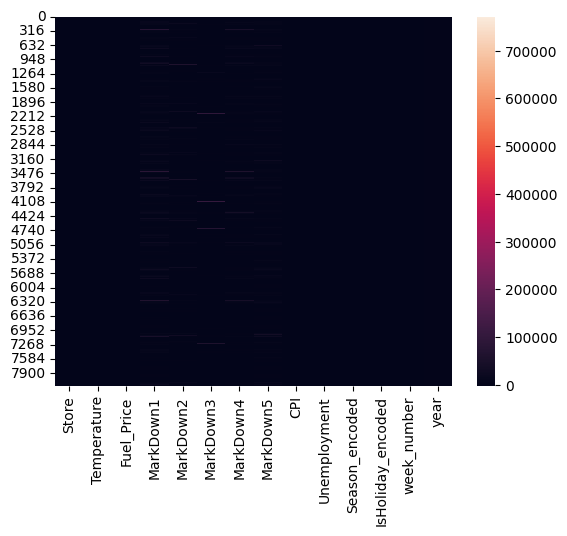

In [108]:
sns.heatmap(df1)

In [110]:
df1.corr()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Season_encoded,IsHoliday_encoded,week_number,year
Store,1.000000e+00,-0.020566,0.066682,-0.086875,-0.051160,-0.027943,-0.056059,-0.008213,-0.201670,0.213108,0.019445,-4.186667e-16,8.759568e-16,-3.324389e-12
Temperature,-2.056605e-02,1.000000,0.101354,-0.114759,-0.220157,-0.062782,-0.084683,-0.019703,0.158709,0.145643,-0.497550,-1.619056e-01,2.255052e-01,-3.837331e-02
Fuel_Price,6.668205e-02,0.101354,1.000000,0.262974,0.030076,0.028349,0.148889,0.100203,-0.184127,-0.032900,-0.004148,-7.823797e-02,-5.592715e-02,6.577771e-01
MarkDown1,-8.687521e-02,-0.114759,0.262974,1.000000,0.157191,-0.018466,0.826422,0.178319,0.011579,-0.125634,0.052474,1.097352e-01,-1.334138e-01,4.322745e-01
MarkDown2,-5.116017e-02,-0.220157,0.030076,0.157191,1.000000,-0.016411,0.068612,0.049990,-0.005533,-0.069098,0.057457,2.082465e-01,-2.459429e-02,1.511035e-01
MarkDown3,-2.794349e-02,-0.062782,0.028349,-0.018466,-0.016411,1.000000,-0.014163,0.010083,-0.004009,-0.034171,0.000925,3.187497e-01,1.453261e-01,2.602515e-02
MarkDown4,-5.605868e-02,-0.084683,0.148889,0.826422,0.068612,-0.014163,1.000000,0.119594,-0.008947,-0.077243,0.033290,9.978873e-02,-1.480080e-01,2.850451e-01
MarkDown5,-8.212923e-03,-0.019703,0.100203,0.178319,0.049990,0.010083,0.119594,1.000000,0.018244,-0.043458,-0.007201,-1.223194e-02,3.352610e-02,1.594635e-01
CPI,-2.016696e-01,0.158709,-0.184127,0.011579,-0.005533,-0.004009,-0.008947,0.018244,1.000000,-0.303110,-0.102200,1.005442e-03,-1.066369e-03,7.625503e-02
Unemployment,2.131079e-01,0.145643,-0.032900,-0.125634,-0.069098,-0.034171,-0.077243,-0.043458,-0.303110,1.000000,-0.117627,-2.636558e-03,9.134052e-03,-2.740494e-01


<Axes: >

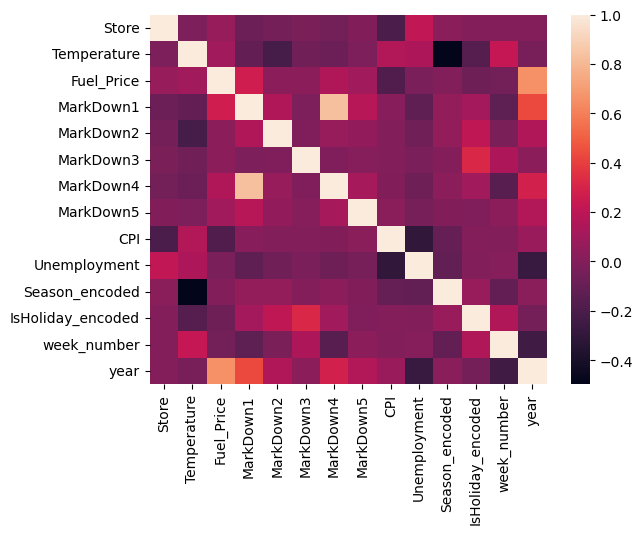

In [111]:
import seaborn as sns

sns.heatmap(df1.corr())

In [113]:
df1[:5]

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Season_encoded,IsHoliday_encoded,week_number,year
0,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,0,5,2010
1,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,2,1,6,2010
2,1,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,2,0,7,2010
3,1,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,2,0,8,2010
4,1,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,2,0,9,2010


In [123]:
df2 = pd.read_csv('sales_data_set.csv')# Performing a left join on 'store' column
df2 = df2.drop(columns='IsHoliday')
df2

,Store,Dept,Date,Weekly_Sales
0,1,1,05/02/2010,24924.50
1,1,1,12/02/2010,46039.49
2,1,1,19/02/2010,41595.55
3,1,1,26/02/2010,19403.54
4,1,1,05/03/2010,21827.90
...,...,...,...,...
421565,45,98,28/09/2012,508.37
421566,45,98,05/10/2012,628.10
421567,45,98,12/10/2012,1061.02
421568,45,98,19/10/2012,760.01


In [122]:
df2['Store'].nunique()

45

In [118]:
df3 = pd.read_csv('stores_data_set.csv')
df3[:5]

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [119]:
result = pd.merge(df1, df3, on='Store', how='left')

result.to_csv('test.csv', index=False)

In [120]:
pd.read_csv('test.csv')

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Season_encoded,IsHoliday_encoded,week_number,year,Type,Size
0,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106000,2,0,5,2010,A,151315
1,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106000,2,1,6,2010,A,151315
2,1,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106000,2,0,7,2010,A,151315
3,1,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106000,2,0,8,2010,A,151315
4,1,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106000,2,0,9,2010,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,172.460809,7.826821,3,0,26,2013,B,118221
8186,45,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,172.460809,7.826821,3,0,27,2013,B,118221
8187,45,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,172.460809,7.826821,3,0,28,2013,B,118221
8188,45,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,172.460809,7.826821,0,0,29,2013,B,118221


In [17]:
df4 = pd.read_csv('merge_sales_store_data.csv')
df4

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,B,118221
421566,45,98,05/10/2012,628.10,False,B,118221
421567,45,98,12/10/2012,1061.02,False,B,118221
421568,45,98,19/10/2012,760.01,False,B,118221


In [19]:
df4['Date'] = pd.to_datetime(df4['Date'], format='%d/%m/%Y')
df5 = df4
df5

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221
421566,45,98,2012-10-05,628.10,False,B,118221
421567,45,98,2012-10-12,1061.02,False,B,118221
421568,45,98,2012-10-19,760.01,False,B,118221


In [125]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Season,Season_encoded,IsHoliday_encoded,week_number,year,month
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,Spring,2,0,5,2010,2
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,Spring,2,1,6,2010,2
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,Spring,2,0,7,2010,2
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,Spring,2,0,8,2010,2
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,Spring,2,0,9,2010,3


In [ ]:
result = pd.merge(df, df4, on='Date', how='left')

result.to_csv('All_test.csv', index=False)

In [21]:
df4.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size'], dtype='object')

In [25]:
df['Date']

0       2010-02-05
1       2010-02-12
2       2010-02-19
3       2010-02-26
4       2010-03-05
           ...    
8185    2013-06-28
8186    2013-07-05
8187    2013-07-12
8188    2013-07-19
8189    2013-07-26
Name: Date, Length: 8190, dtype: object

In [26]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Store              8190 non-null   int64         
 1   Date               8190 non-null   datetime64[ns]
 2   Temperature        8190 non-null   float64       
 3   Fuel_Price         8190 non-null   float64       
 4   MarkDown1          8190 non-null   float64       
 5   MarkDown2          8190 non-null   float64       
 6   MarkDown3          8190 non-null   float64       
 7   MarkDown4          8190 non-null   float64       
 8   MarkDown5          8190 non-null   float64       
 9   CPI                8190 non-null   float64       
 10  Unemployment       8190 non-null   float64       
 11  IsHoliday          8190 non-null   bool          
 12  Season             8190 non-null   object        
 13  Season_encoded     8190 non-null   int64         
 14  IsHolida

In [27]:
# Merge the datasets on 'Store', 'Date', and 'IsHoliday'
merged_df = pd.merge(df4, df, on=['Store', 'Date', 'IsHoliday'])

In [34]:
merged_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown4,MarkDown5,CPI,Unemployment,Season,Season_encoded,IsHoliday_encoded,week_number,year,month
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,...,0.00,0.00,211.096358,8.106,Spring,2,0,5,2010,2
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,0.00,...,0.00,0.00,211.096358,8.106,Spring,2,0,5,2010,2
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,0.00,...,0.00,0.00,211.096358,8.106,Spring,2,0,5,2010,2
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,0.00,...,0.00,0.00,211.096358,8.106,Spring,2,0,5,2010,2
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,0.00,...,0.00,0.00,211.096358,8.106,Spring,2,0,5,2010,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,4018.91,...,211.94,858.33,192.308899,8.667,Spring,2,0,43,2012,10
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,4018.91,...,211.94,858.33,192.308899,8.667,Spring,2,0,43,2012,10
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,4018.91,...,211.94,858.33,192.308899,8.667,Spring,2,0,43,2012,10
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,4018.91,...,211.94,858.33,192.308899,8.667,Spring,2,0,43,2012,10


In [36]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# Label encoding
label_encoder = LabelEncoder()
merged_df['Type'] = label_encoder.fit_transform(merged_df['Type'])
# df['IsHoliday_encoded'] = label_encoder.fit_transform(df['IsHoliday'])

In [37]:
merged_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown4,MarkDown5,CPI,Unemployment,Season,Season_encoded,IsHoliday_encoded,week_number,year,month
0,1,1,2010-02-05,24924.50,False,0,151315,42.31,2.572,0.00,...,0.00,0.00,211.096358,8.106,Spring,2,0,5,2010,2
1,1,2,2010-02-05,50605.27,False,0,151315,42.31,2.572,0.00,...,0.00,0.00,211.096358,8.106,Spring,2,0,5,2010,2
2,1,3,2010-02-05,13740.12,False,0,151315,42.31,2.572,0.00,...,0.00,0.00,211.096358,8.106,Spring,2,0,5,2010,2
3,1,4,2010-02-05,39954.04,False,0,151315,42.31,2.572,0.00,...,0.00,0.00,211.096358,8.106,Spring,2,0,5,2010,2
4,1,5,2010-02-05,32229.38,False,0,151315,42.31,2.572,0.00,...,0.00,0.00,211.096358,8.106,Spring,2,0,5,2010,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,1,118221,58.85,3.882,4018.91,...,211.94,858.33,192.308899,8.667,Spring,2,0,43,2012,10
421566,45,94,2012-10-26,5203.31,False,1,118221,58.85,3.882,4018.91,...,211.94,858.33,192.308899,8.667,Spring,2,0,43,2012,10
421567,45,95,2012-10-26,56017.47,False,1,118221,58.85,3.882,4018.91,...,211.94,858.33,192.308899,8.667,Spring,2,0,43,2012,10
421568,45,97,2012-10-26,6817.48,False,1,118221,58.85,3.882,4018.91,...,211.94,858.33,192.308899,8.667,Spring,2,0,43,2012,10


In [45]:

import matplotlib.pyplot as plt
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

In [51]:
lis = ['Store', 'Dept', 'Weekly_Sales','Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'Season_encoded', 'IsHoliday_encoded', 'week_number', 'year']

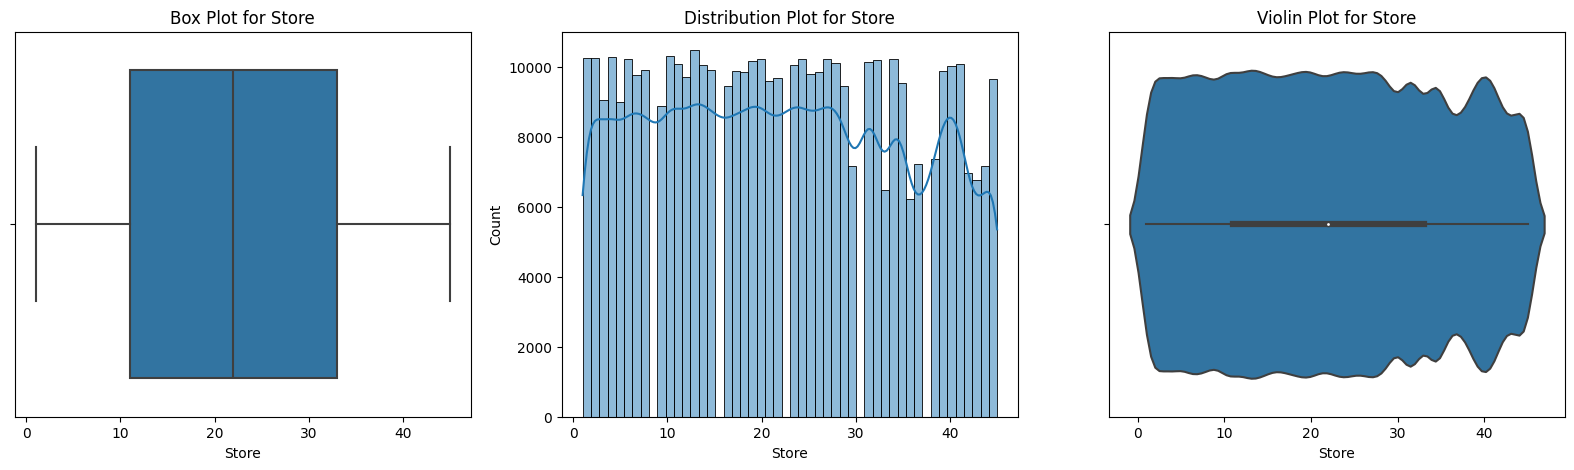

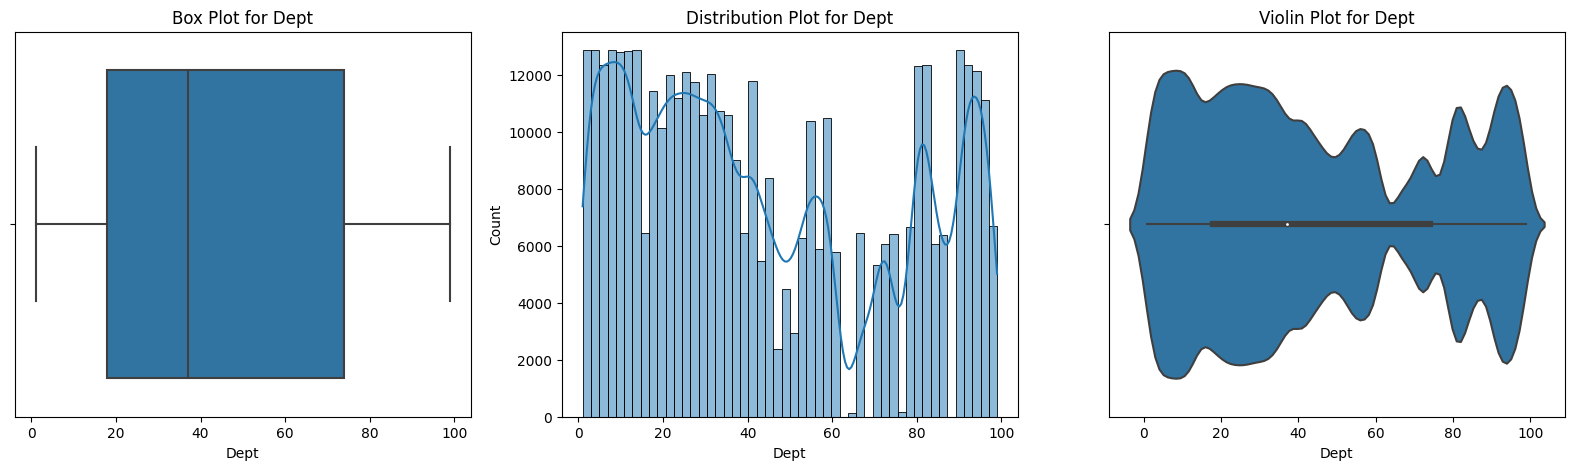

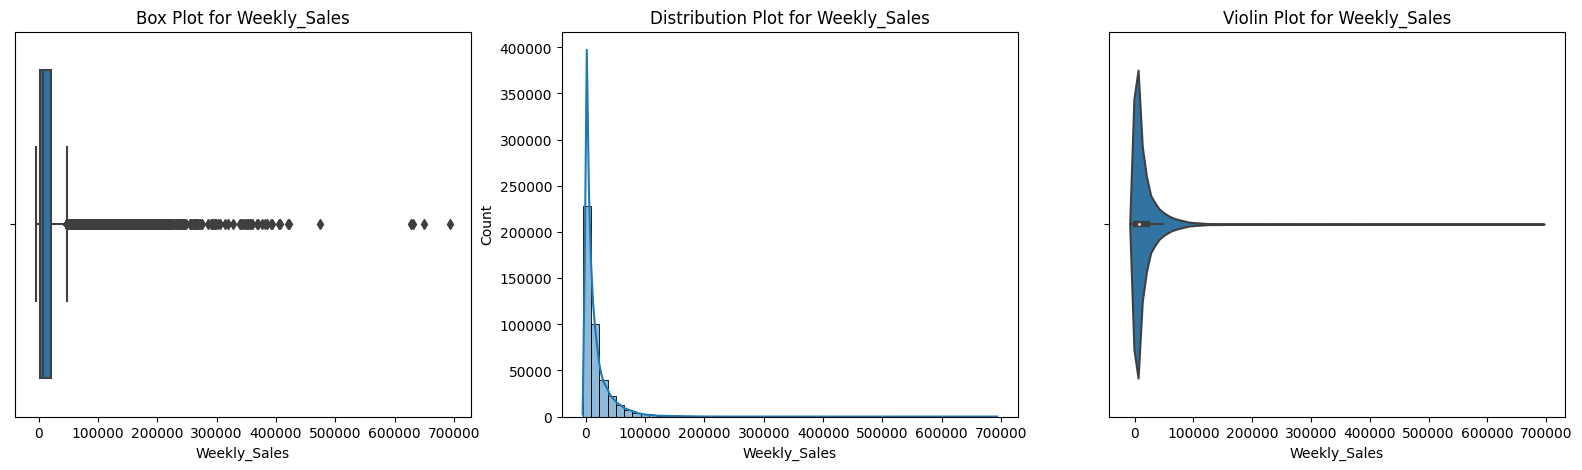

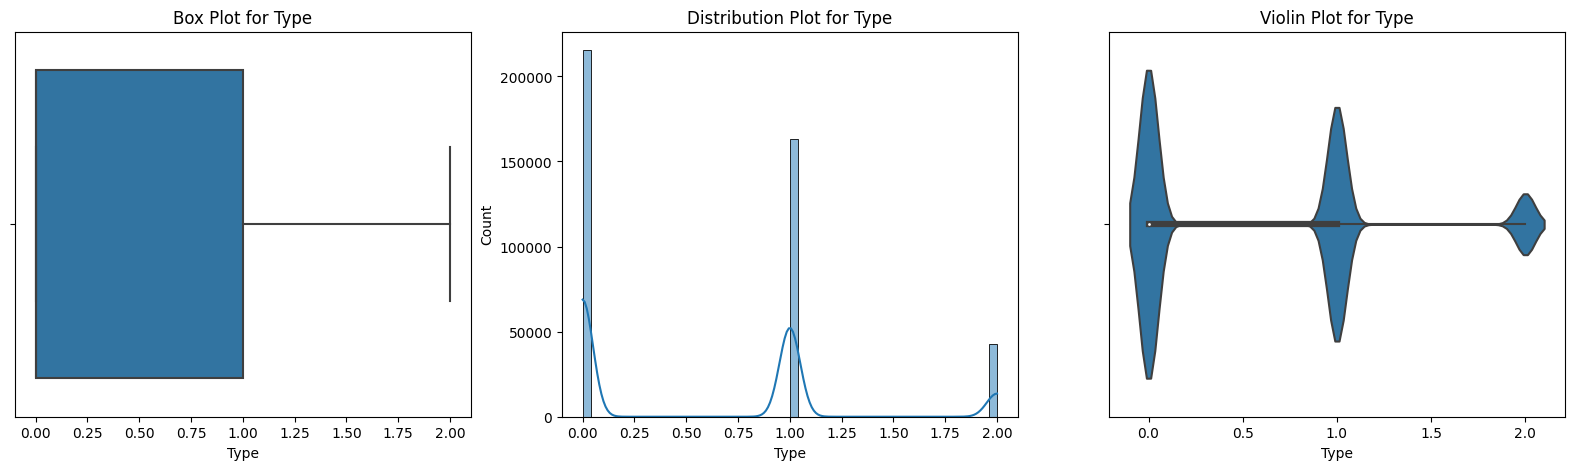

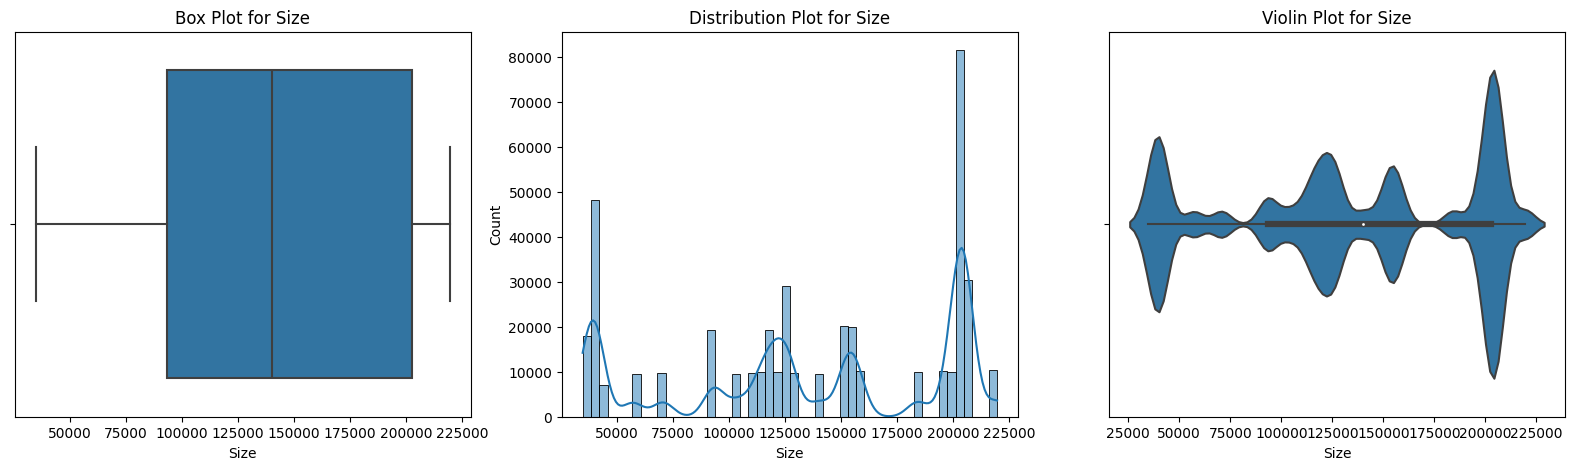

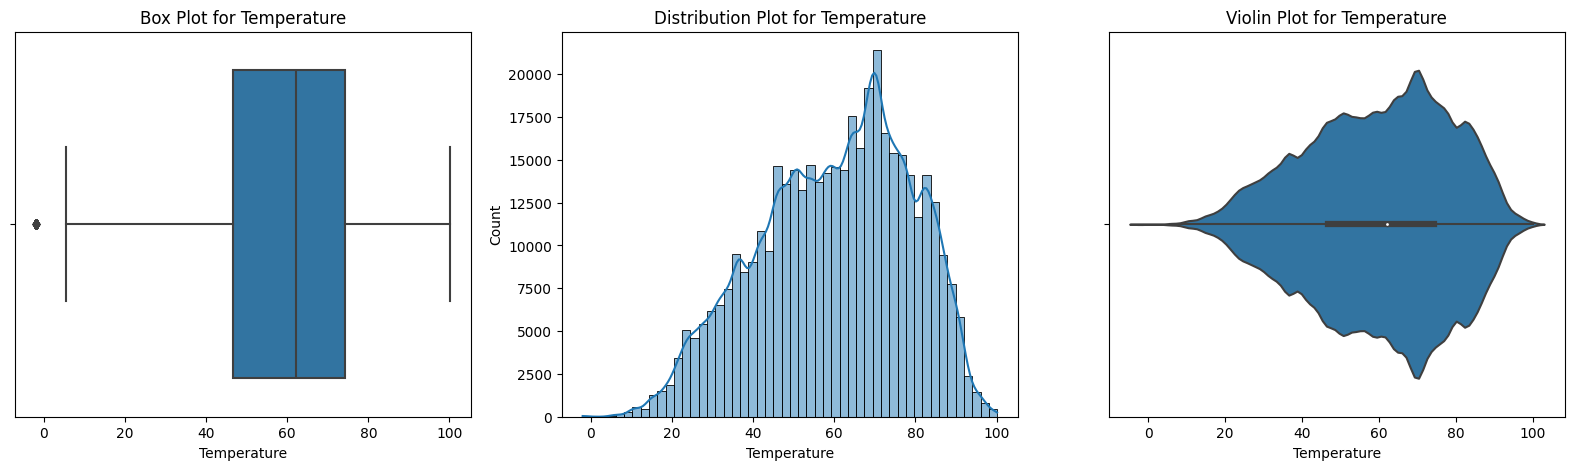

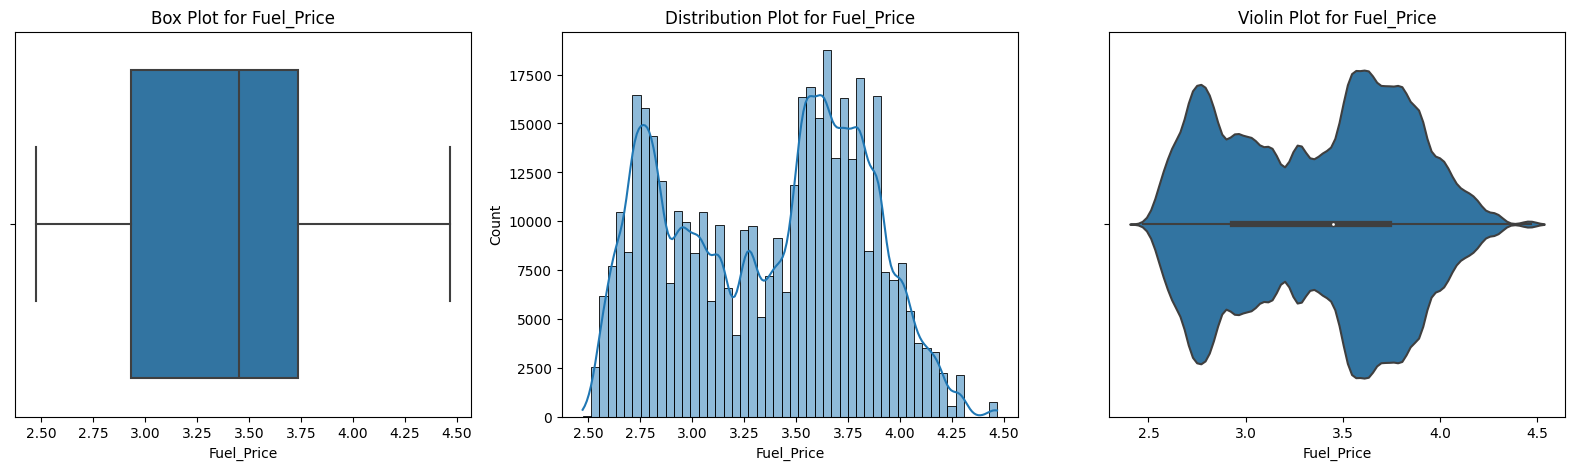

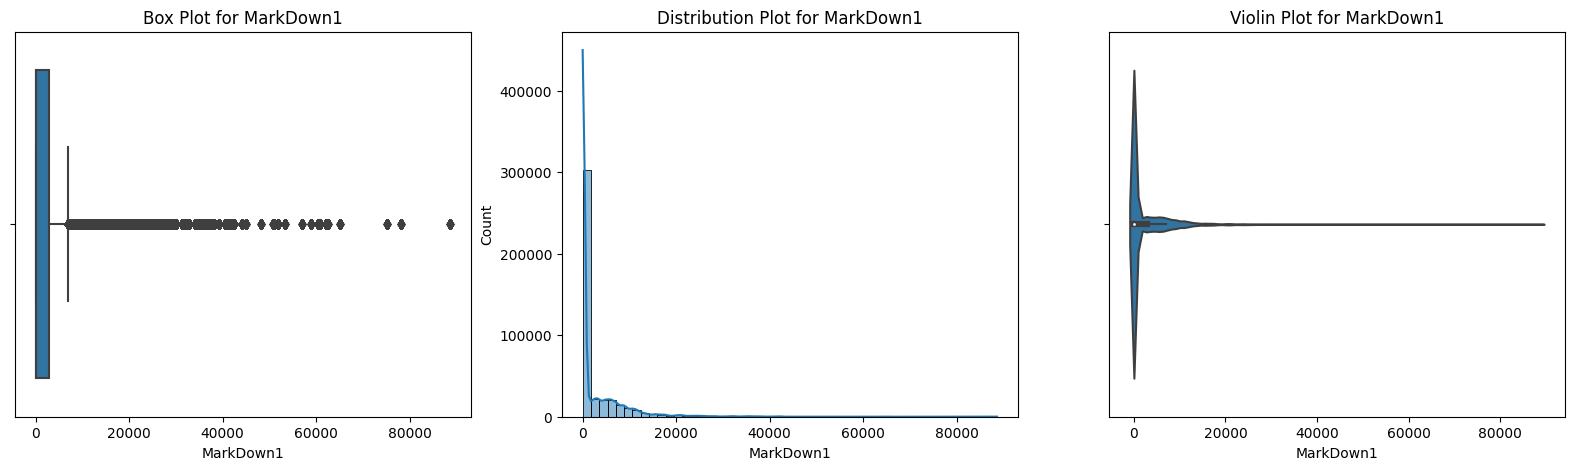

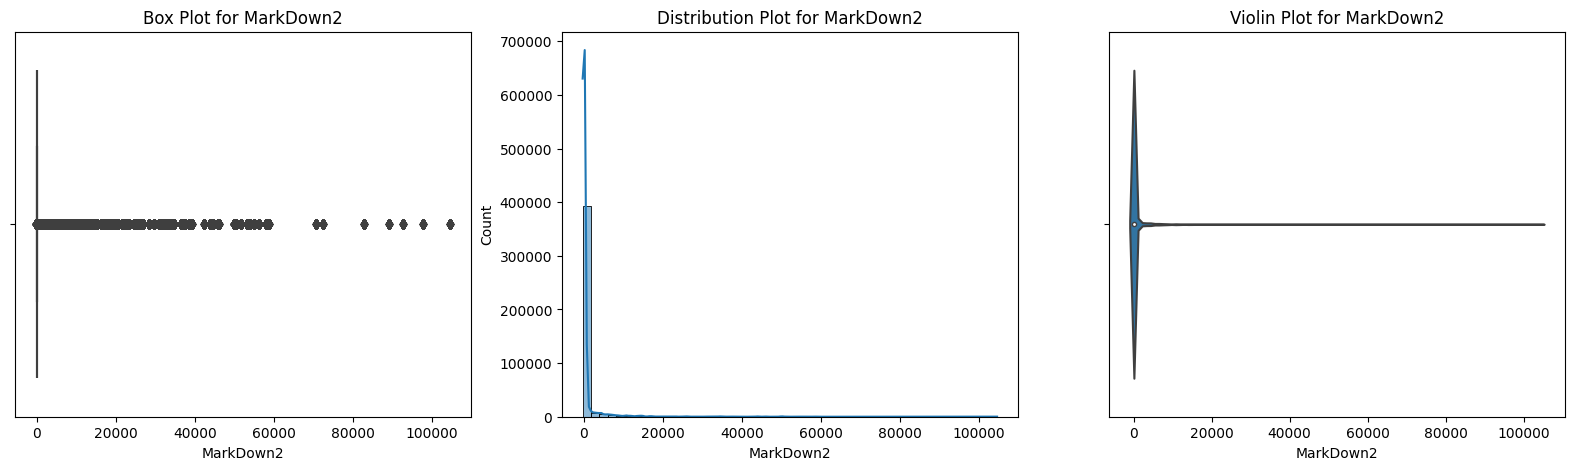

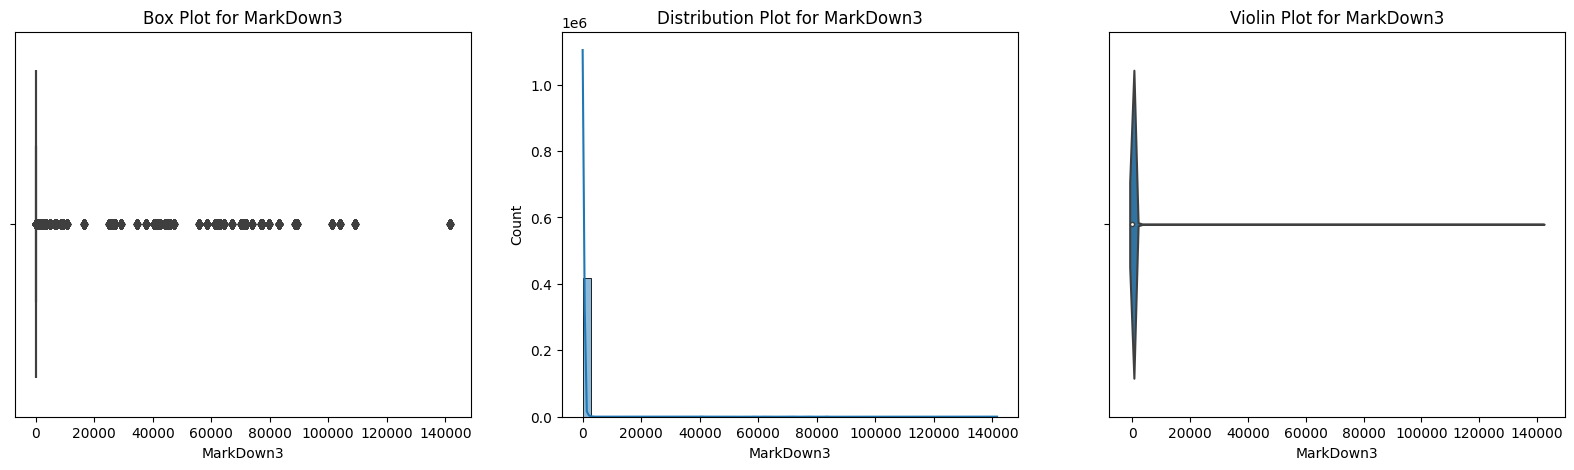

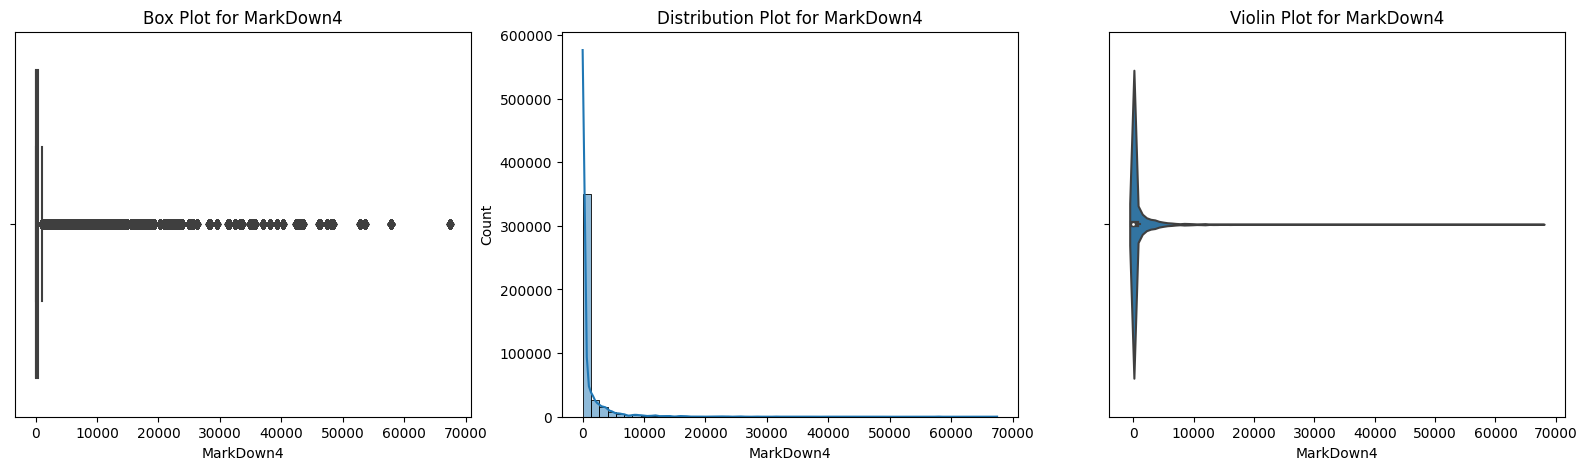

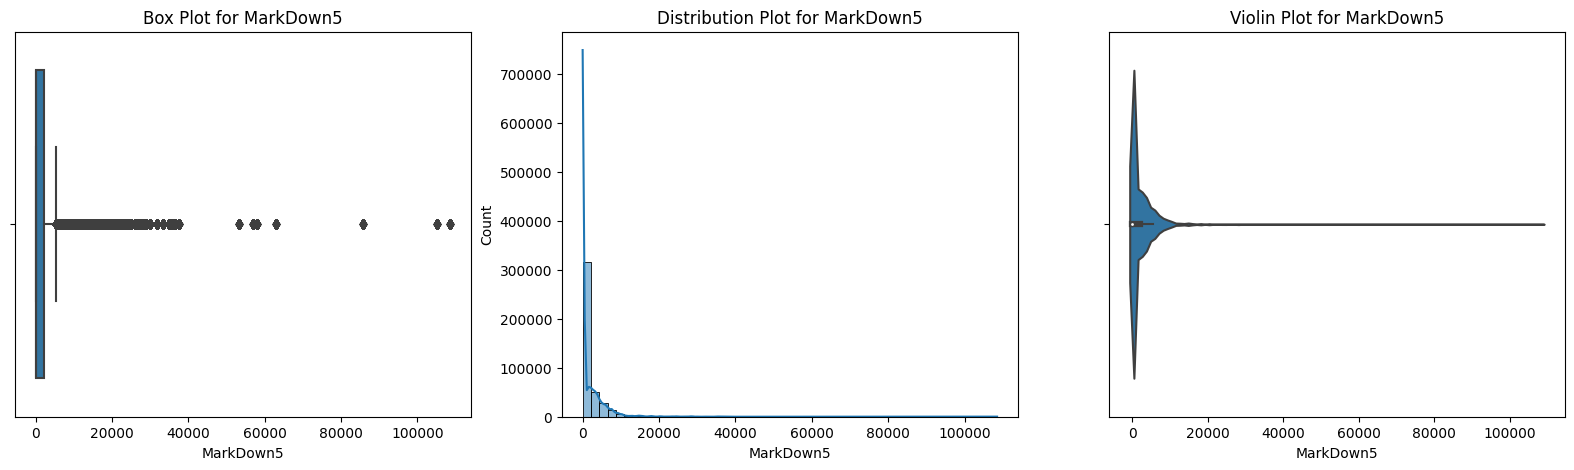

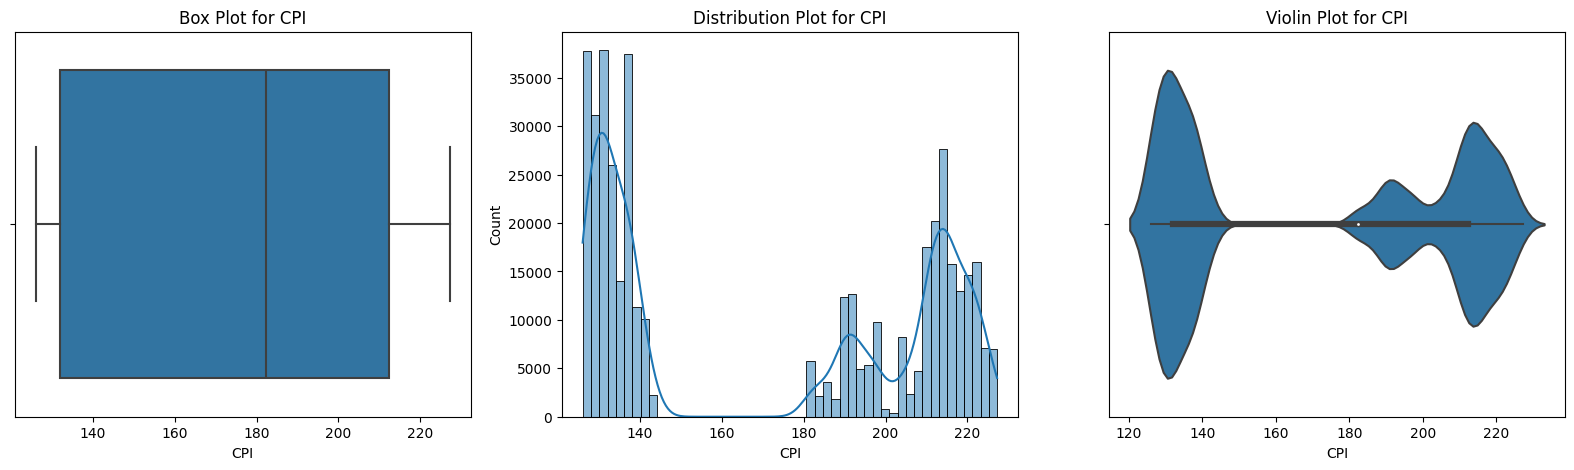

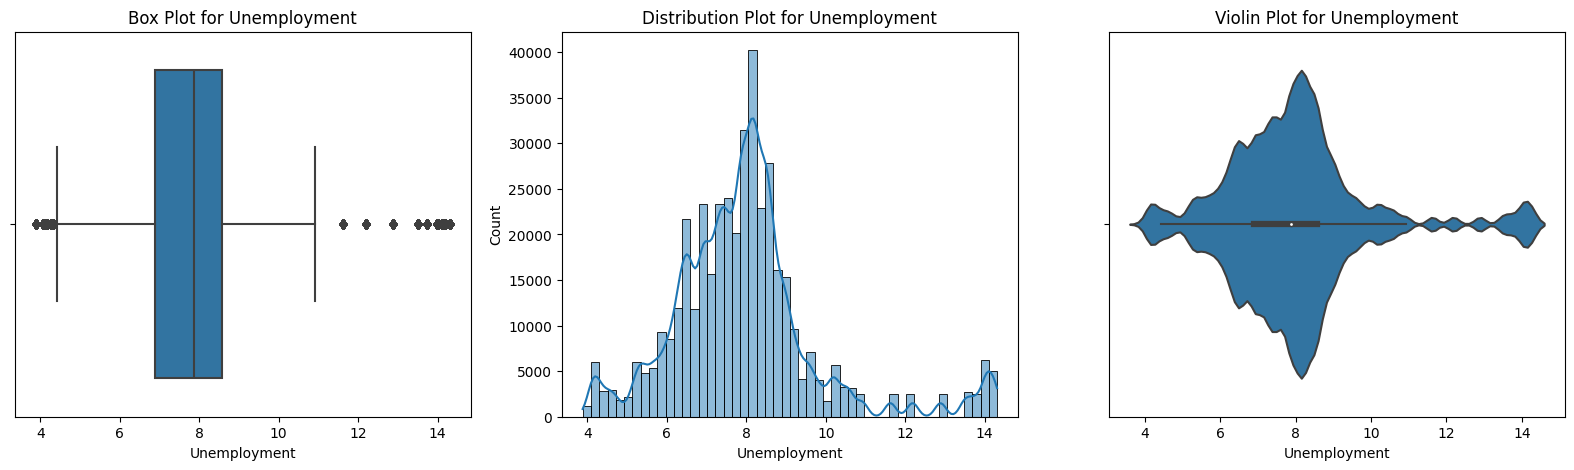

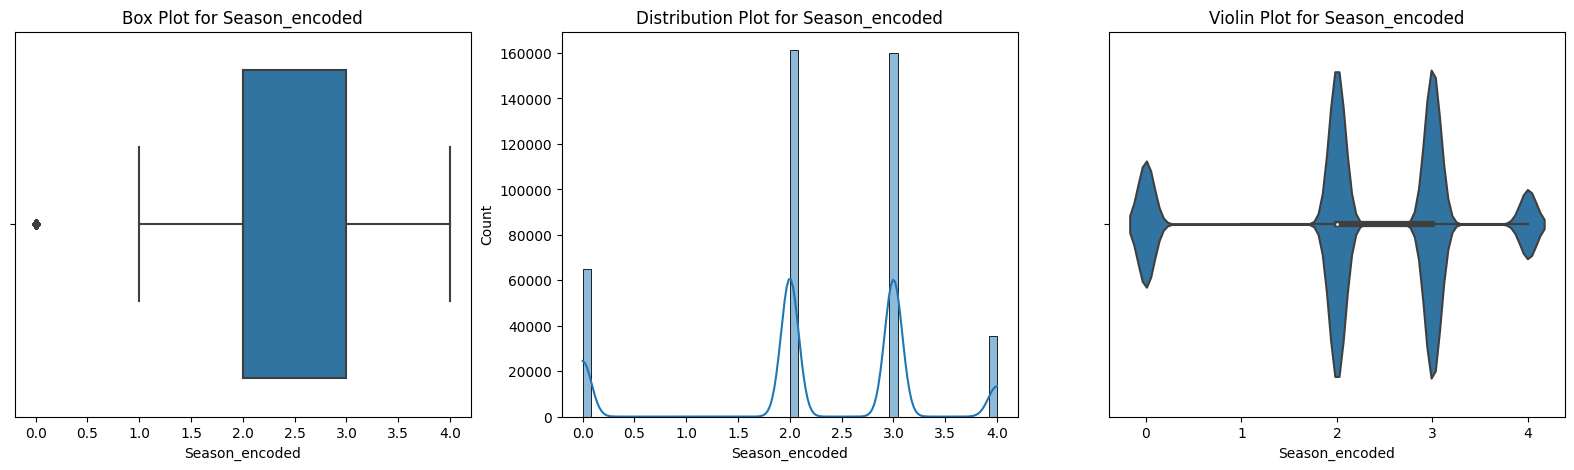

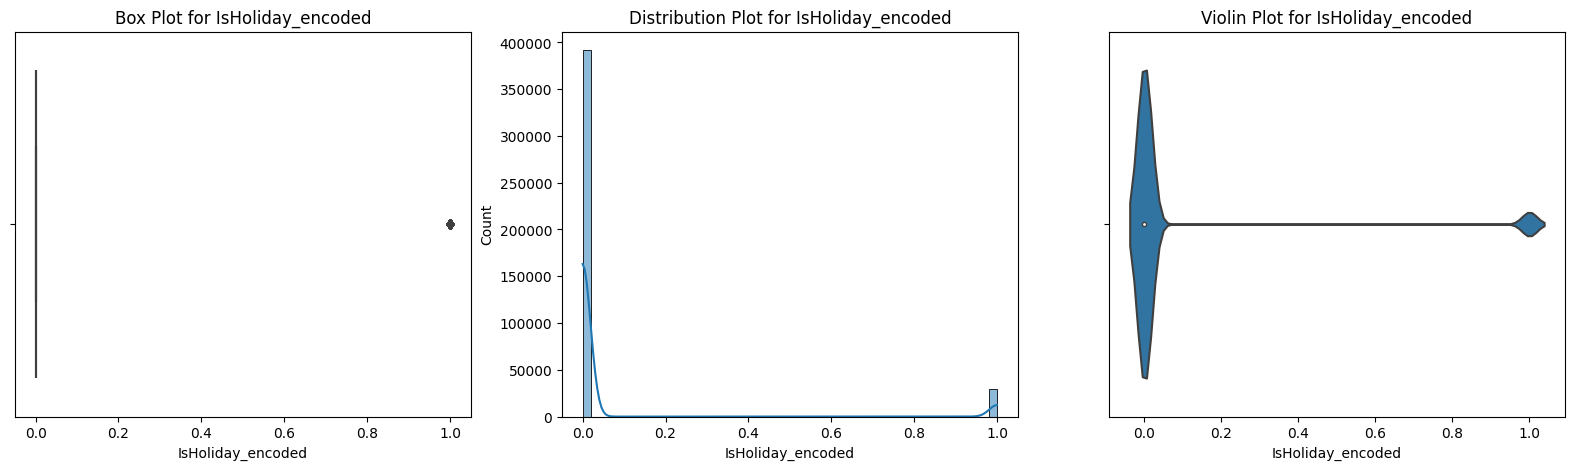

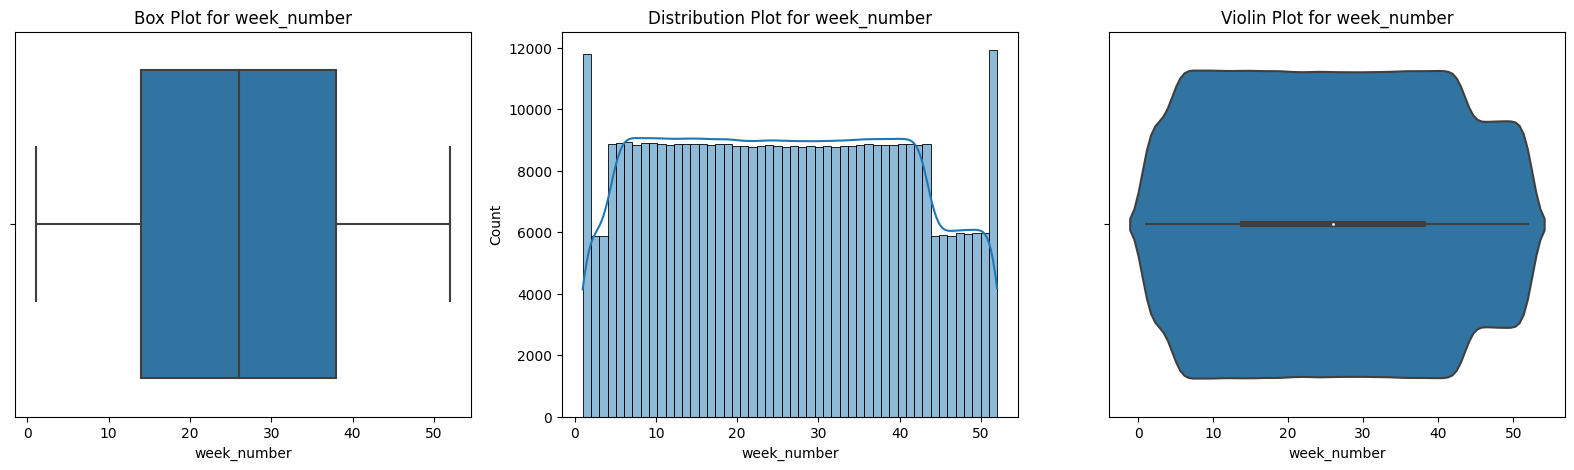

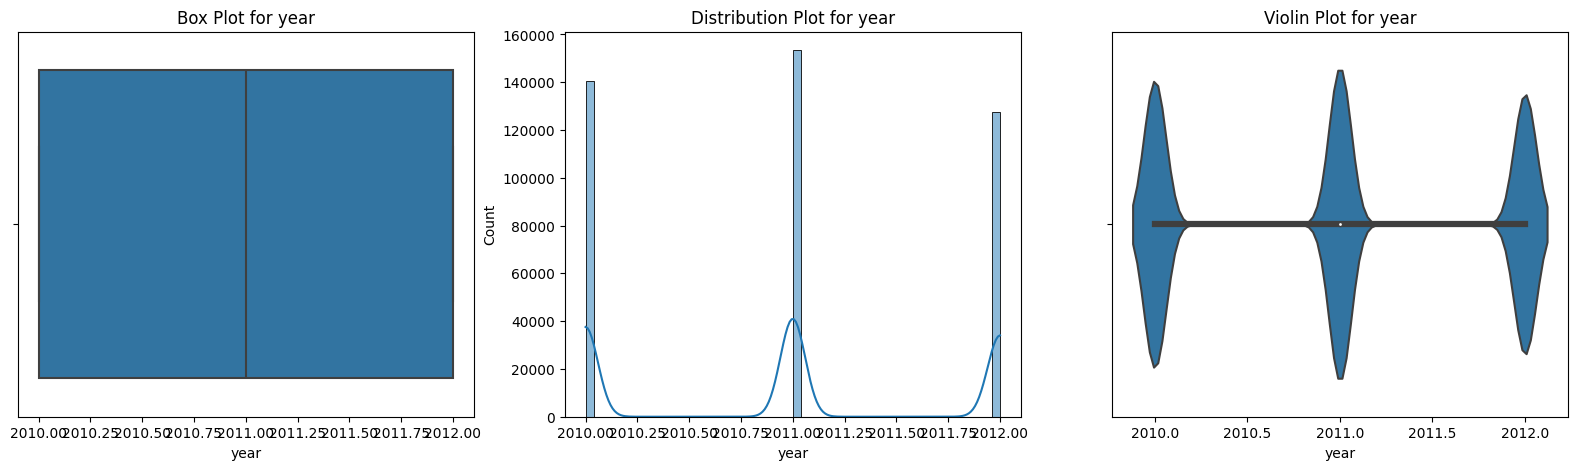

In [52]:
# lis = ['quantity tons', 'thickness', 'width', 'selling_price', 'product_ref',
#        'customer', 'country', 'status', 'item type', 'application']

for i in lis:
    plot(merged_df, i)

In [56]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [54]:
merged_df_copy = merged_df.copy()
merged_df[:5]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown4,MarkDown5,CPI,Unemployment,Season,Season_encoded,IsHoliday_encoded,week_number,year,month
0,1,1,2010-02-05,24924.50,False,0,151315,42.31,2.572,0.0,...,0.0,0.0,211.096358,8.106,Spring,2,0,5,2010,2
1,1,2,2010-02-05,50605.27,False,0,151315,42.31,2.572,0.0,...,0.0,0.0,211.096358,8.106,Spring,2,0,5,2010,2
2,1,3,2010-02-05,13740.12,False,0,151315,42.31,2.572,0.0,...,0.0,0.0,211.096358,8.106,Spring,2,0,5,2010,2
3,1,4,2010-02-05,39954.04,False,0,151315,42.31,2.572,0.0,...,0.0,0.0,211.096358,8.106,Spring,2,0,5,2010,2
4,1,5,2010-02-05,32229.38,False,0,151315,42.31,2.572,0.0,...,0.0,0.0,211.096358,8.106,Spring,2,0,5,2010,2


In [55]:
merged_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Season',
       'Season_encoded', 'IsHoliday_encoded', 'week_number', 'year', 'month'],
      dtype='object')

In [59]:
outlier(merged_df, 'MarkDown1')
outlier(merged_df, 'MarkDown2')
outlier(merged_df, 'MarkDown3')
outlier(merged_df, 'MarkDown4')
outlier(merged_df, 'MarkDown5')
outlier(merged_df, 'CPI')
outlier(merged_df, 'Weekly_Sales')

outlier(merged_df, 'Unemployment')
merged_df[:5]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown4,MarkDown5,CPI,Unemployment,Season,Season_encoded,IsHoliday_encoded,week_number,year,month
0,1,1,2010-02-05,24924.50000,False,0,151315,42.31,2.572,0.0,...,0.0,0.0,211.096358,8.106,Spring,2,0,5,2010,2
1,1,2,2010-02-05,47395.15625,False,0,151315,42.31,2.572,0.0,...,0.0,0.0,211.096358,8.106,Spring,2,0,5,2010,2
2,1,3,2010-02-05,13740.12000,False,0,151315,42.31,2.572,0.0,...,0.0,0.0,211.096358,8.106,Spring,2,0,5,2010,2
3,1,4,2010-02-05,39954.04000,False,0,151315,42.31,2.572,0.0,...,0.0,0.0,211.096358,8.106,Spring,2,0,5,2010,2
4,1,5,2010-02-05,32229.38000,False,0,151315,42.31,2.572,0.0,...,0.0,0.0,211.096358,8.106,Spring,2,0,5,2010,2


# after cleaning outlets

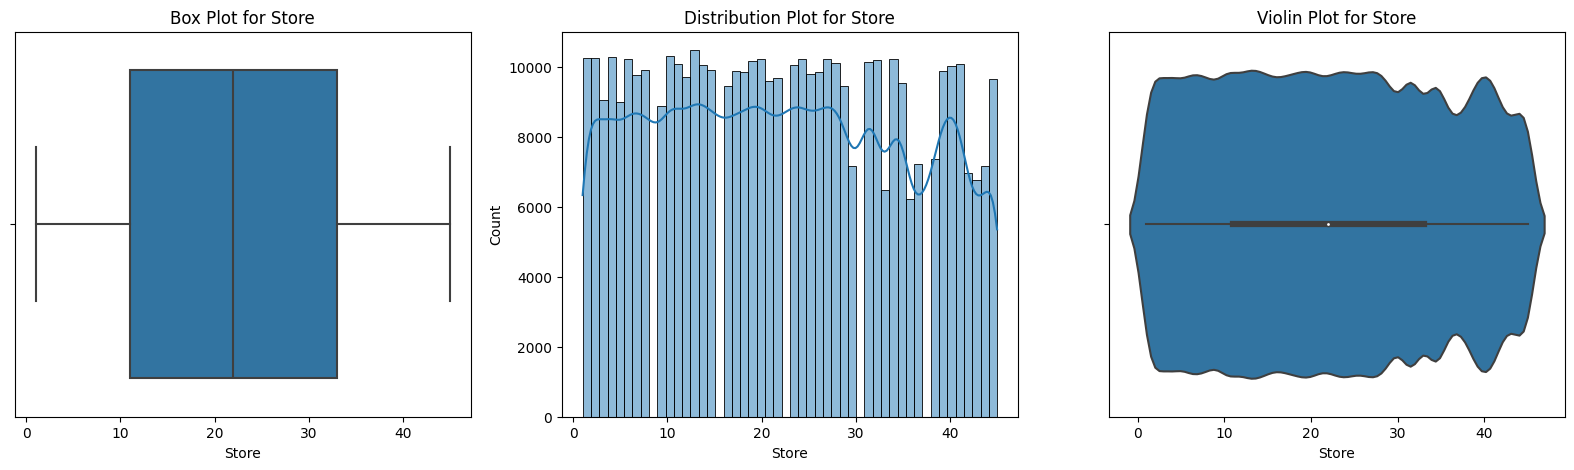

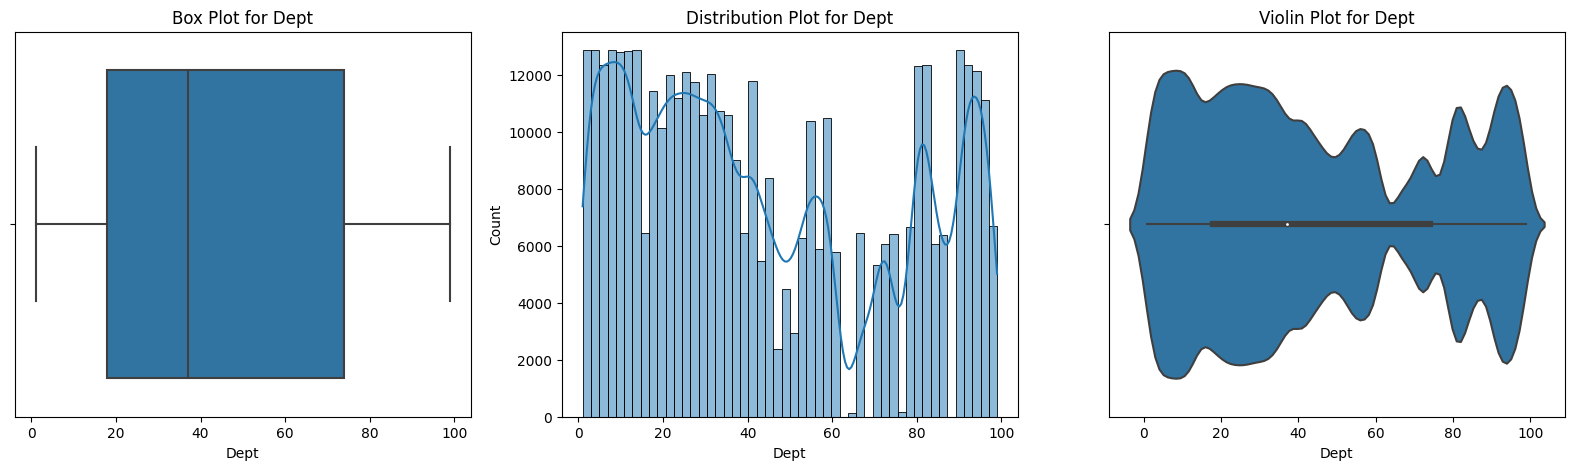

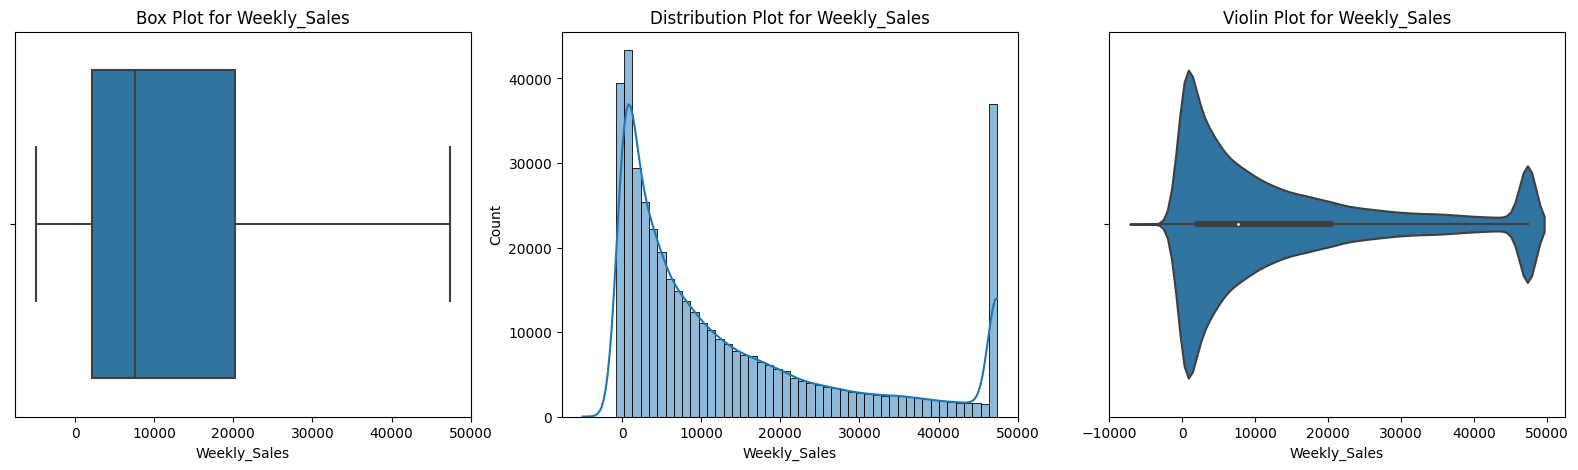

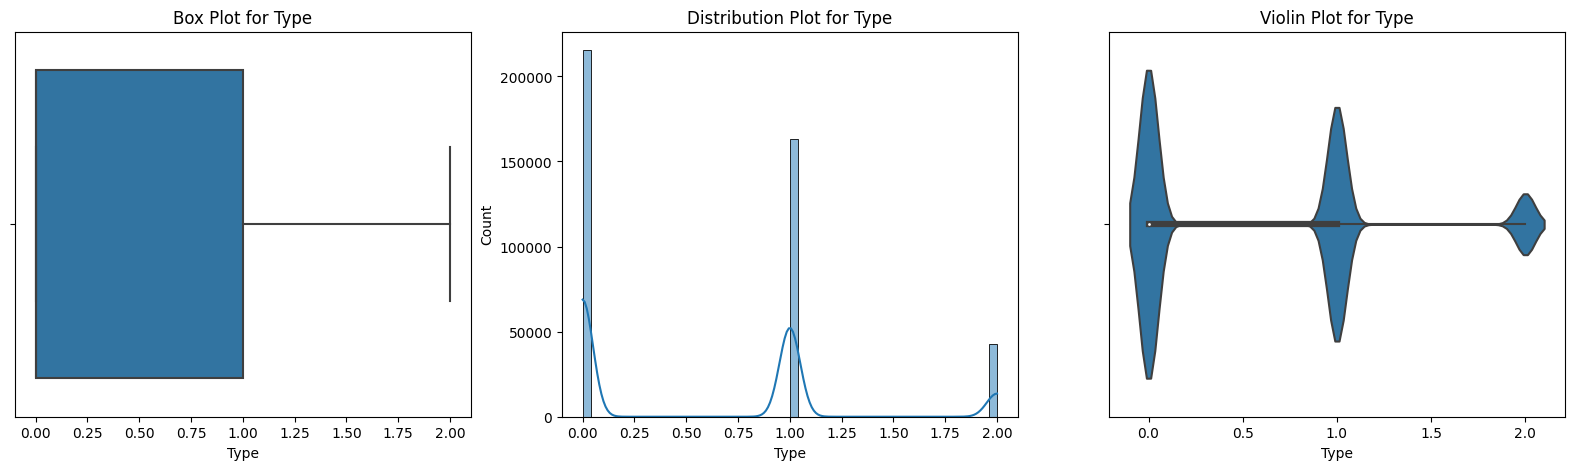

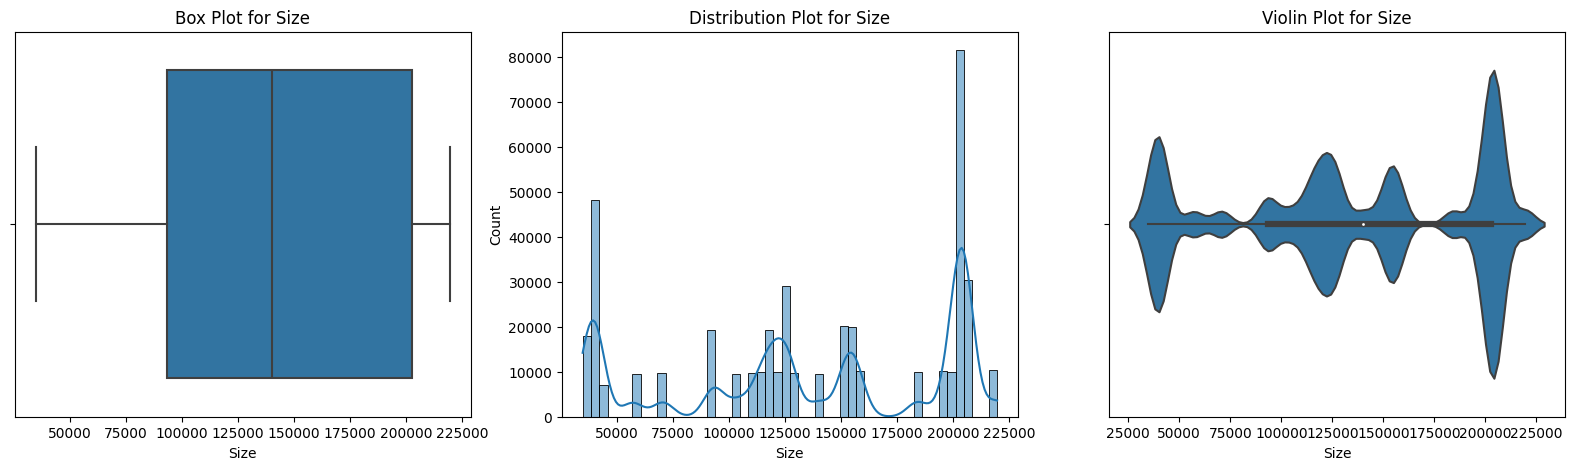

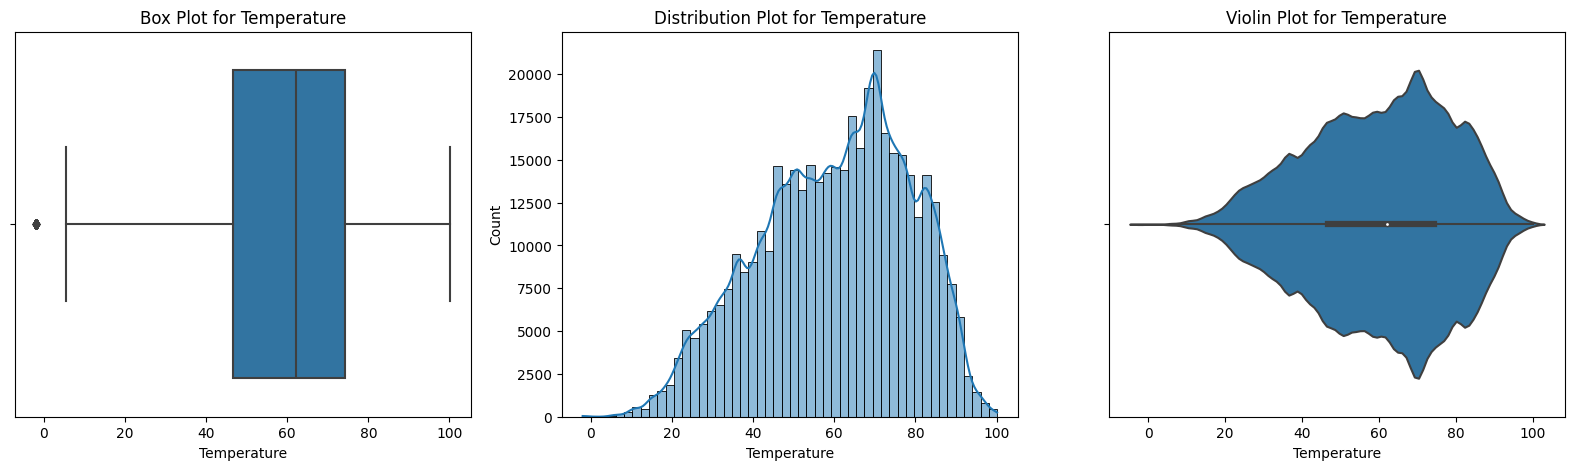

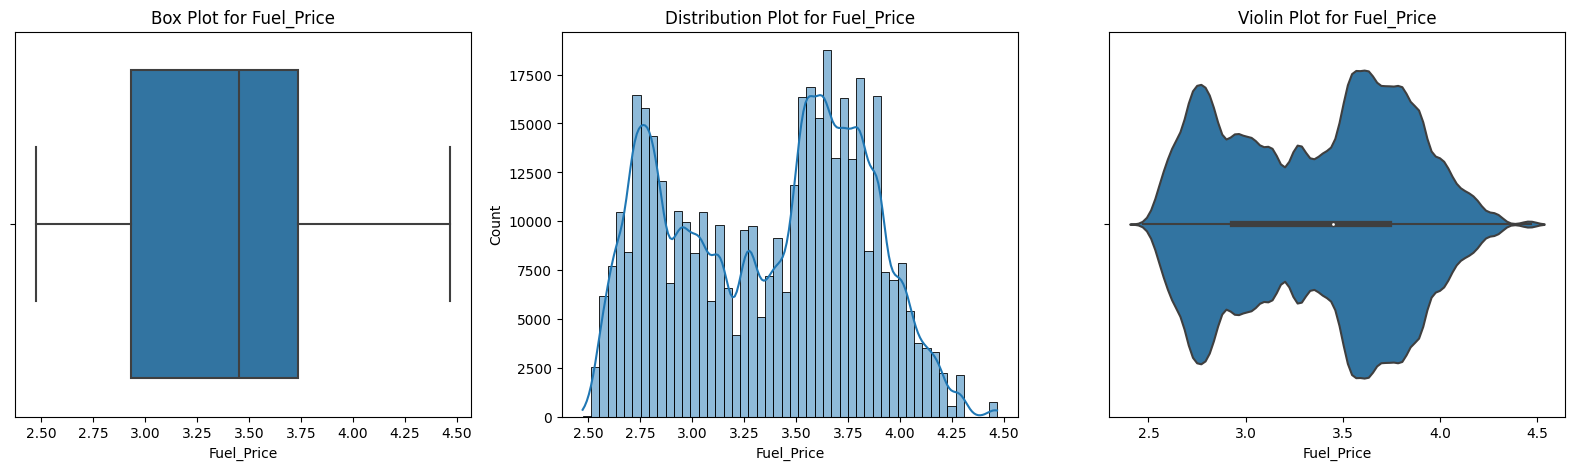

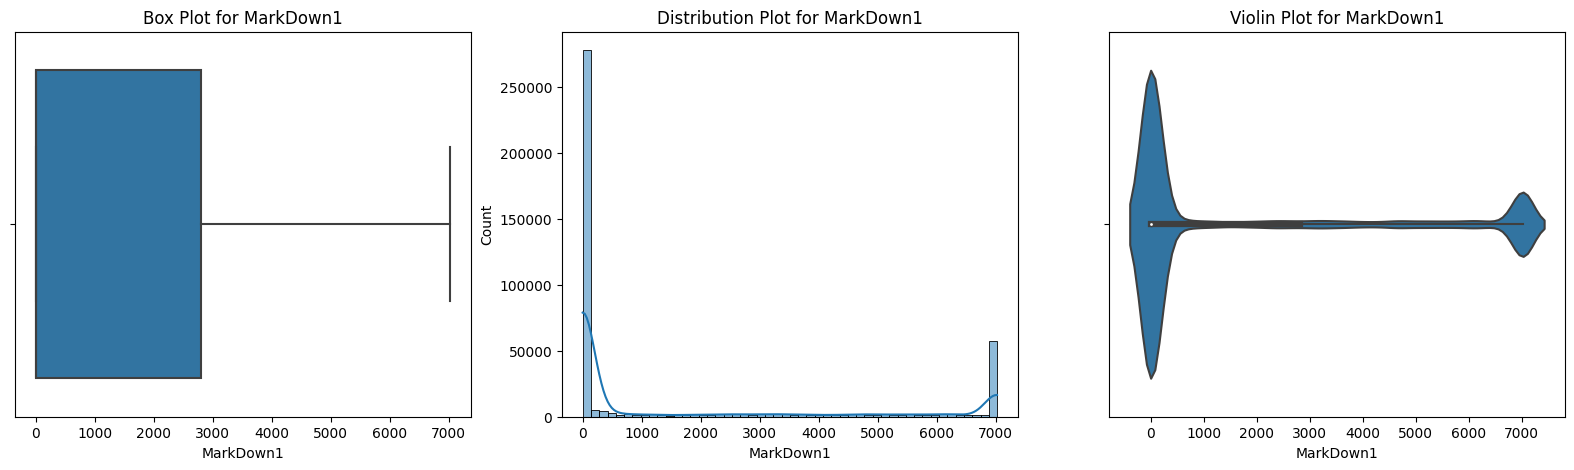

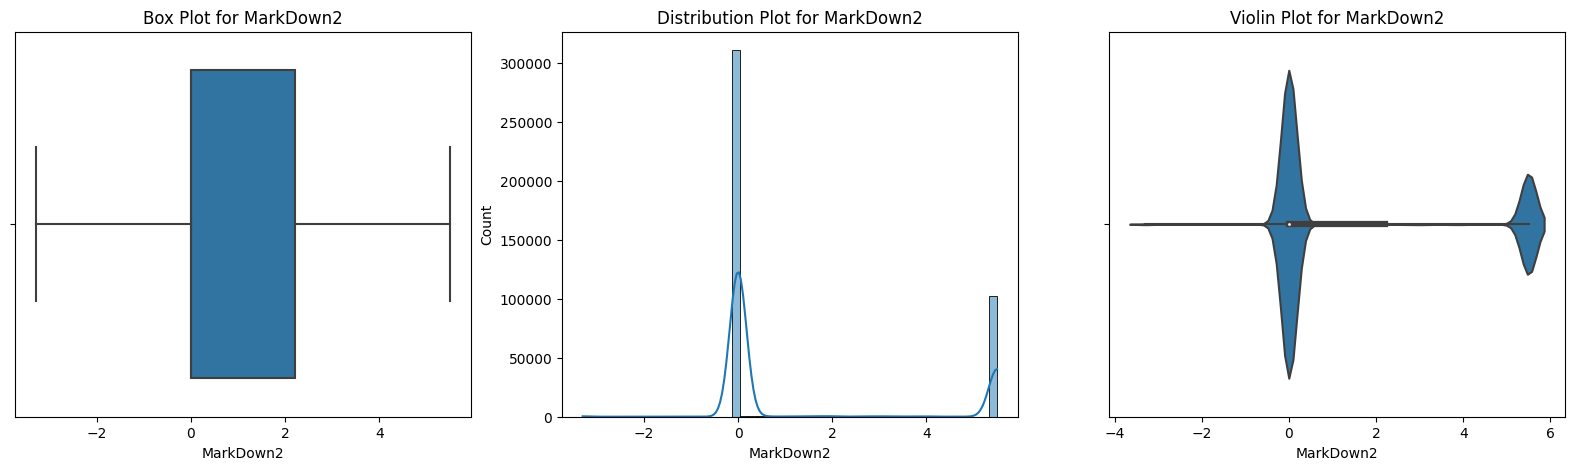

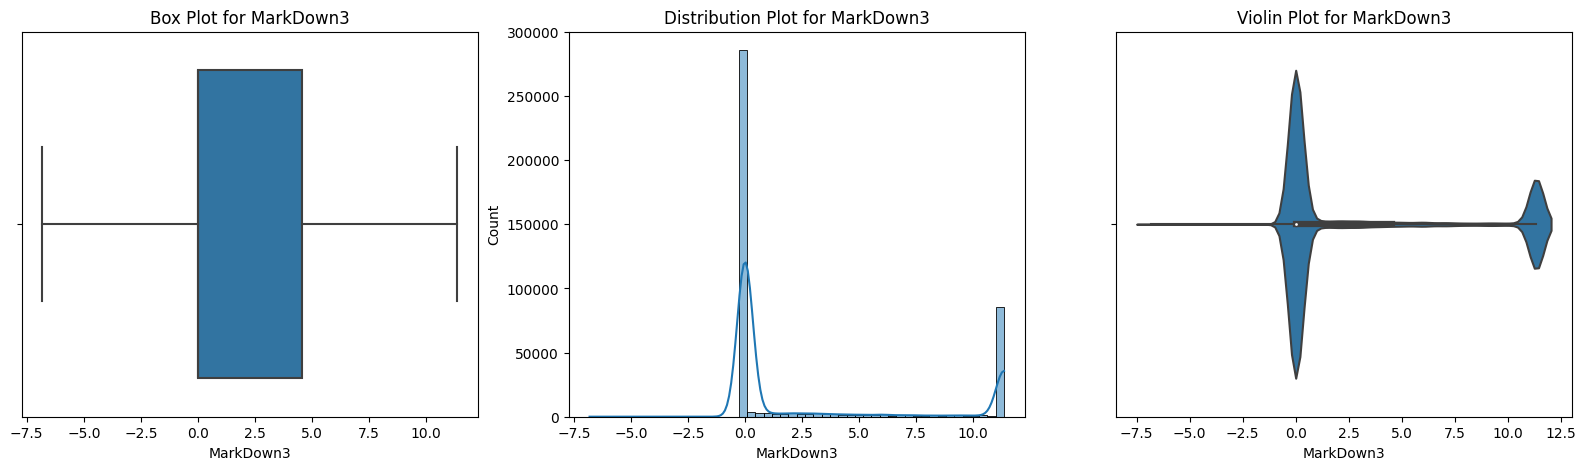

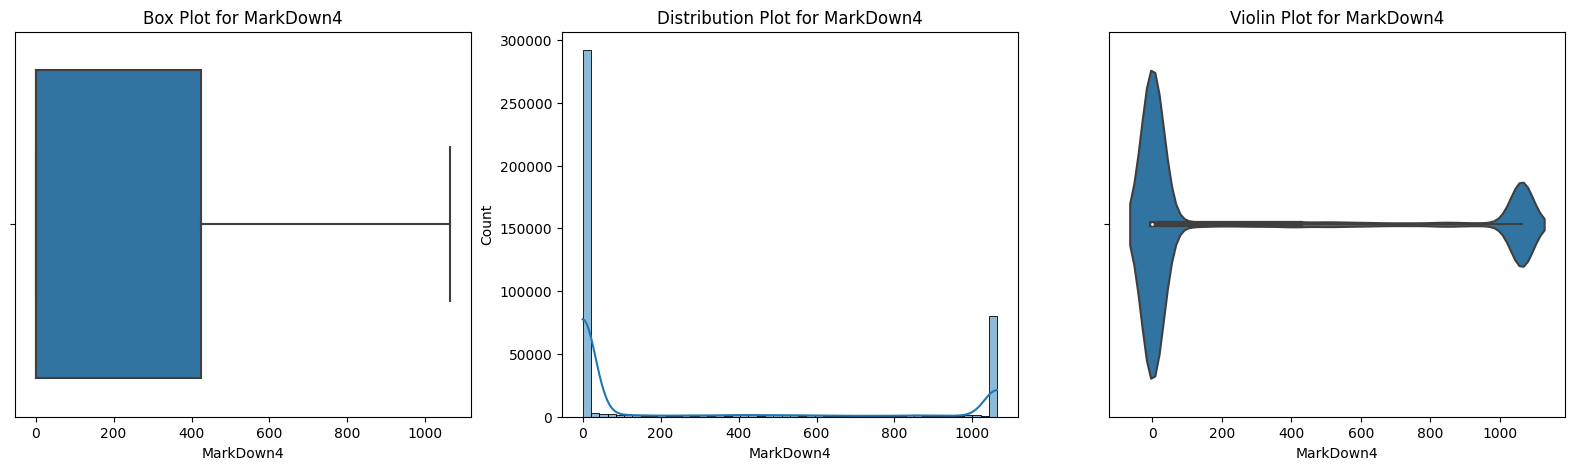

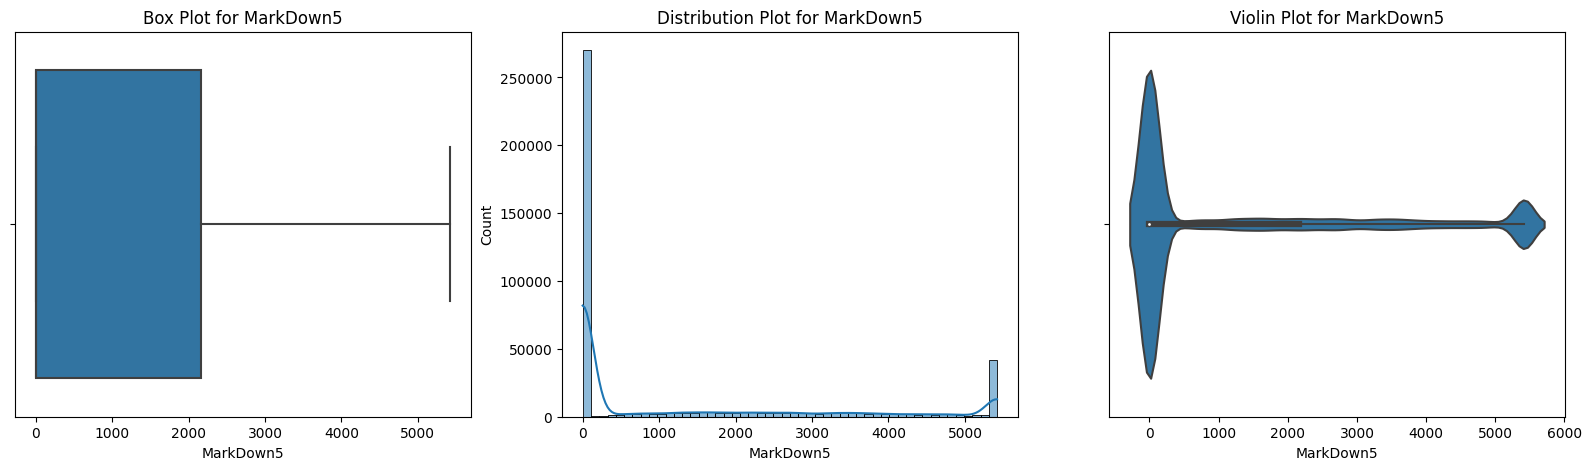

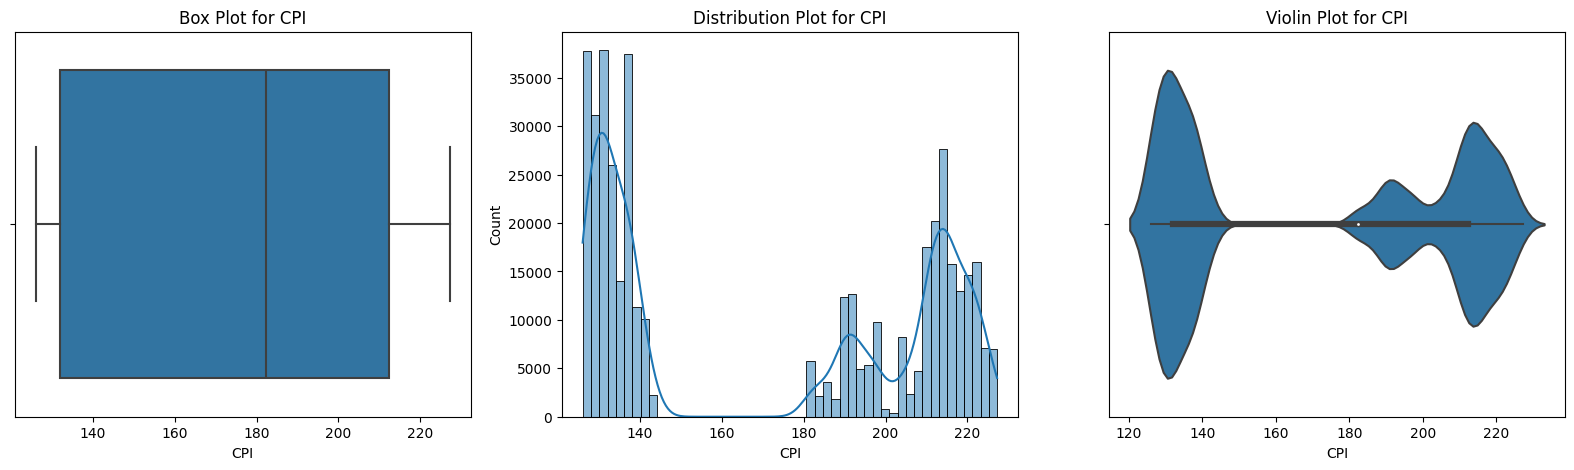

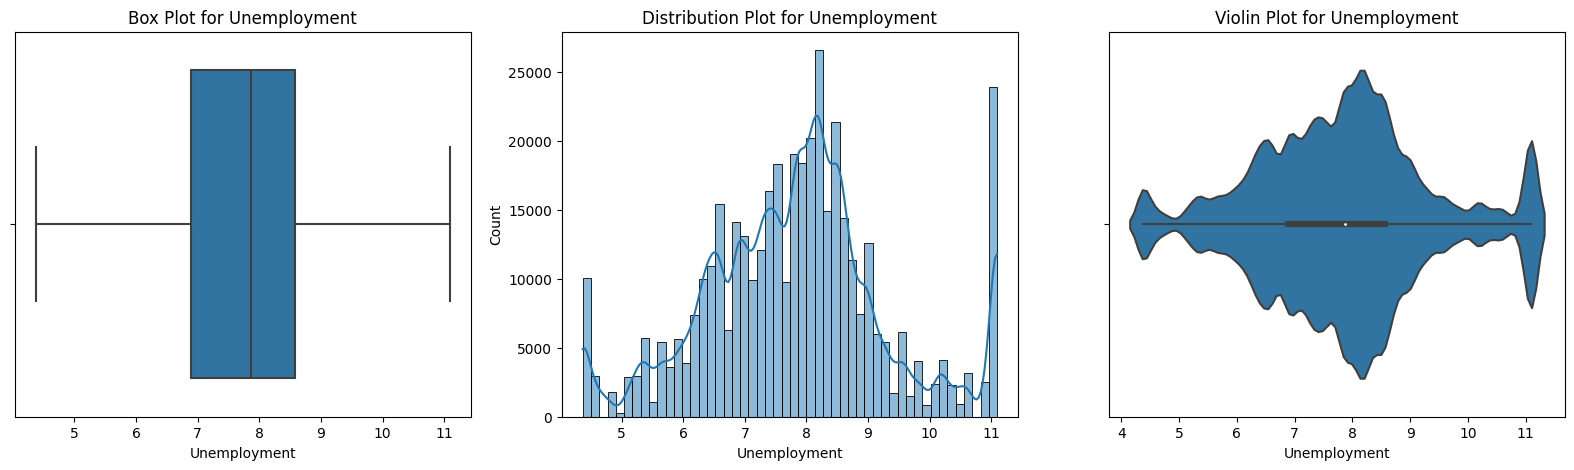

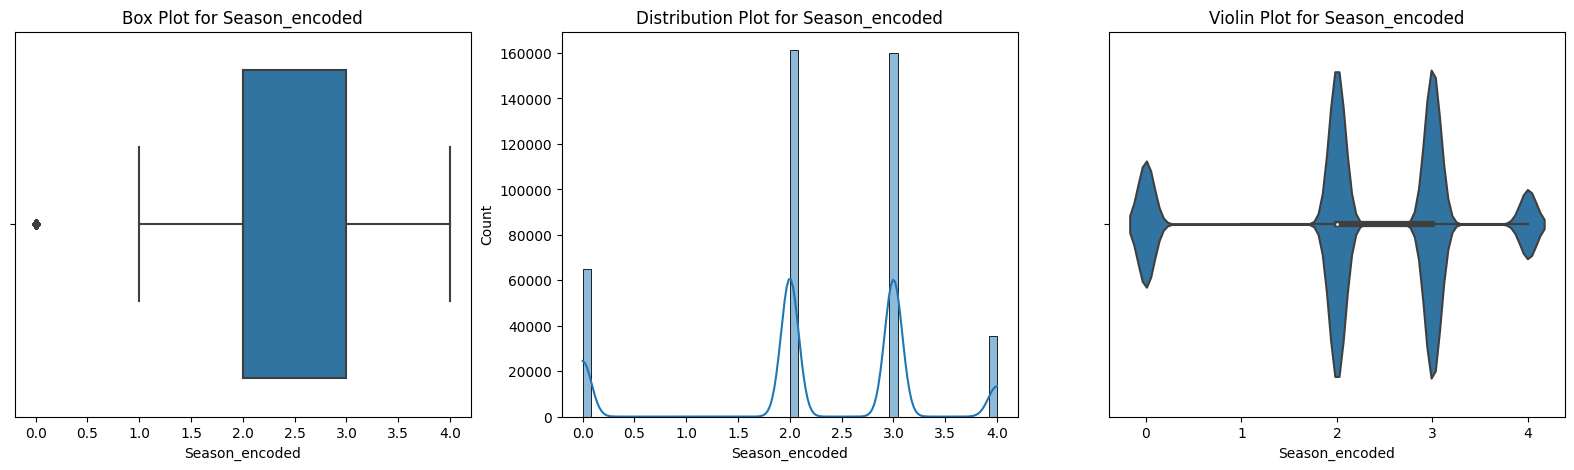

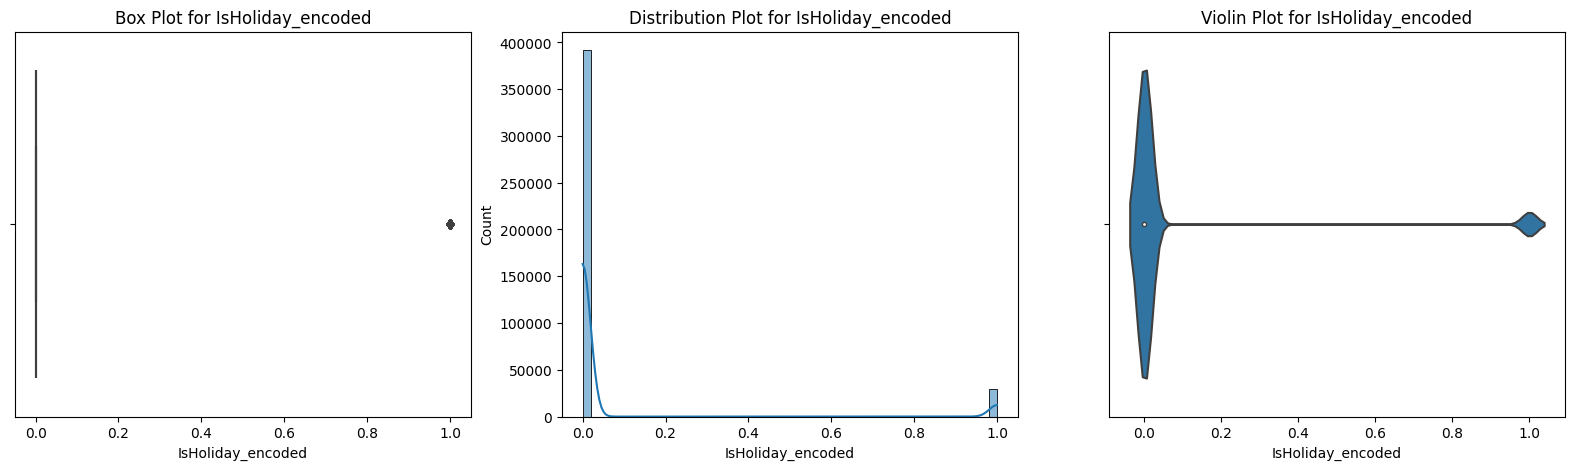

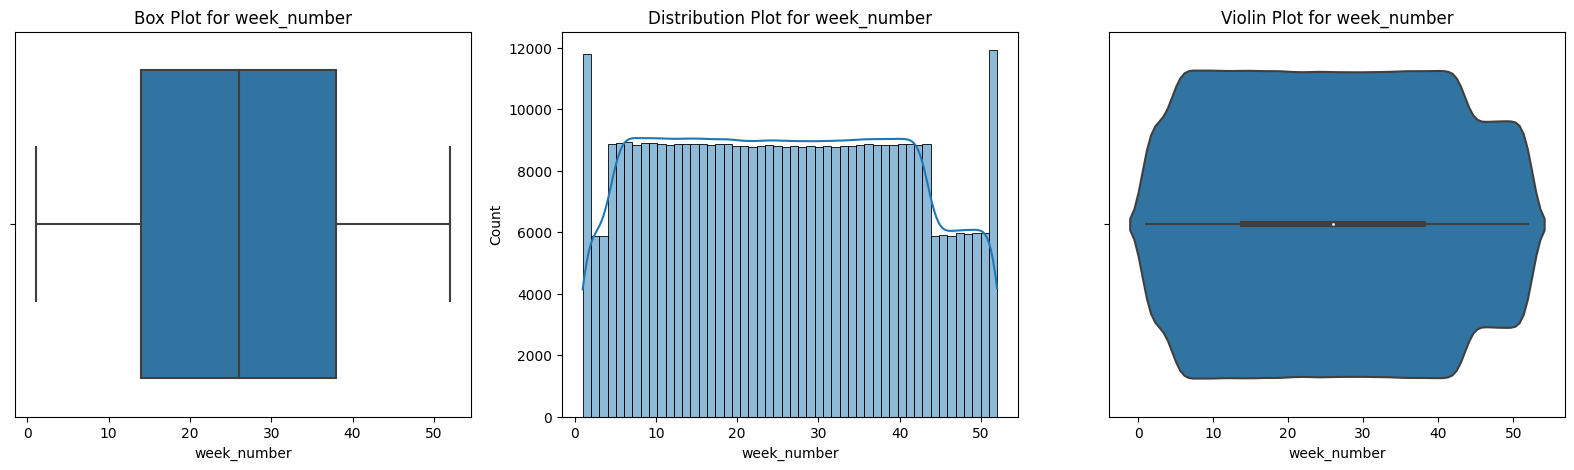

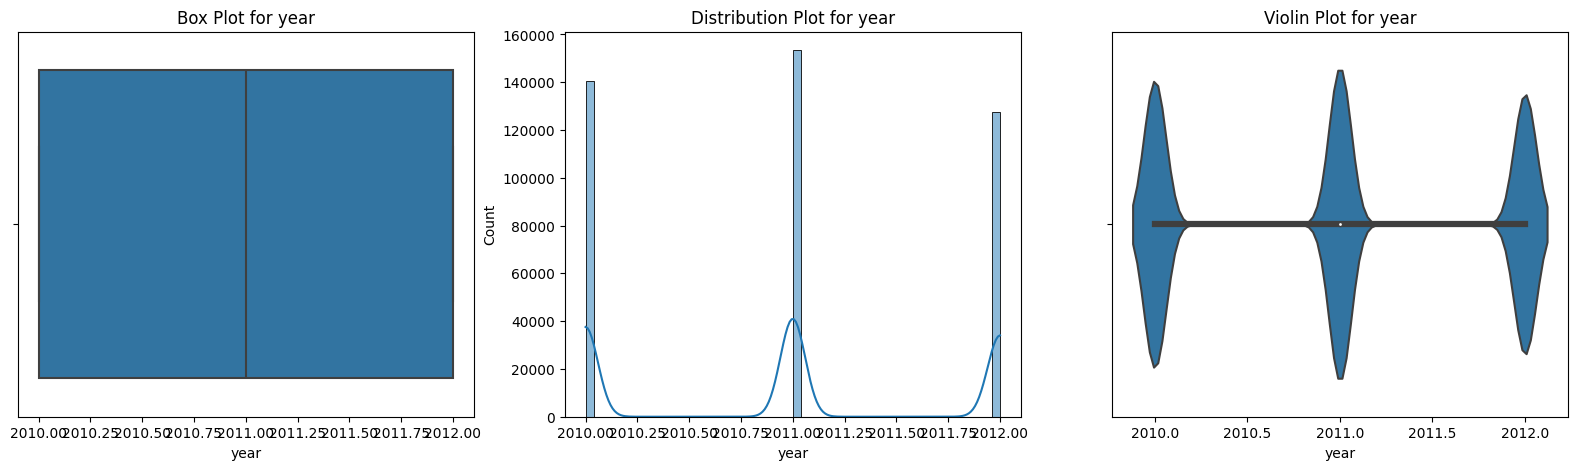

In [60]:
for i in lis:
    plot(merged_df, i)

In [62]:
merged_df.to_csv('Final.csv')

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [3]:
merged_df = pd.read_csv('Final.csv')
merged_df = merged_df.drop(columns='Unnamed: 0')

In [12]:
merged_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Season',
       'Season_encoded', 'IsHoliday_encoded', 'week_number', 'year', 'month'],
      dtype='object')

<Axes: >

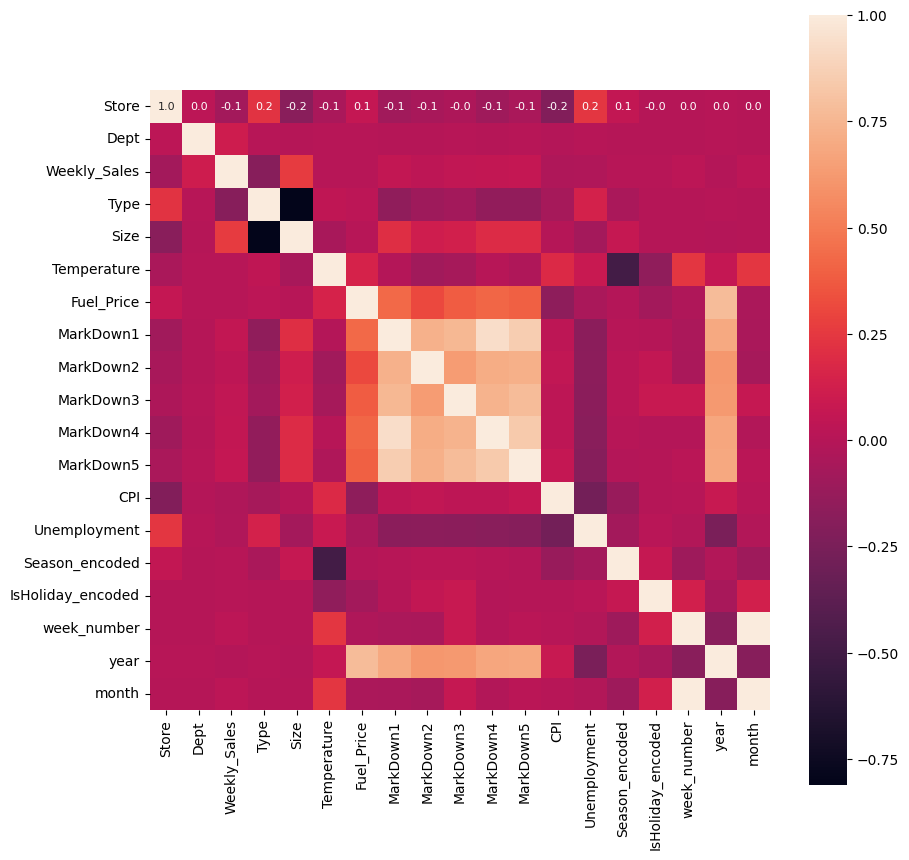

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

df = merged_df[['Store', 'Dept', 'Weekly_Sales',  'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'Season_encoded', 'IsHoliday_encoded', 'week_number', 'year', 'month']]

# sns.heatmap(df.corr(), annot=True)

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8})

<Axes: >

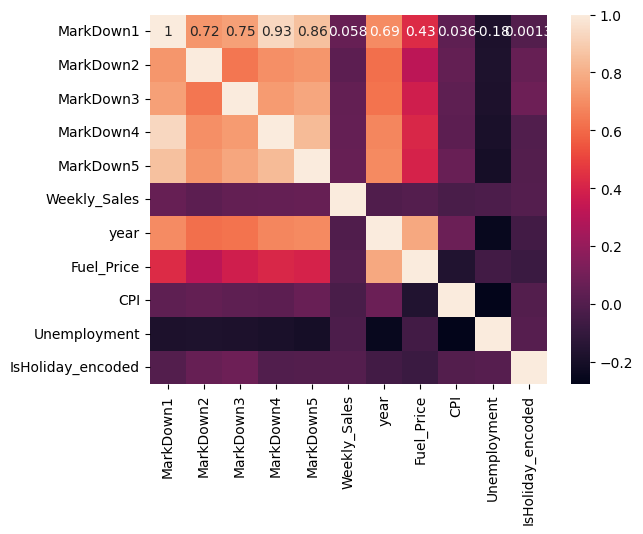

In [20]:
import seaborn as sns
df = merged_df[['MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5','Weekly_Sales','year', 'Fuel_Price','CPI','Unemployment','IsHoliday_encoded']]

sns.heatmap(df.corr(), annot=True)

In [15]:
X = merged_df.drop(columns=['Weekly_Sales', 'Date','IsHoliday','month','Season','Temperature'])
y = merged_df['Weekly_Sales']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
X.columns

Index(['Store', 'Dept', 'Type', 'Size', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'Season_encoded', 'IsHoliday_encoded', 'week_number', 'year'],
      dtype='object')

In [17]:
X = merged_df.drop(columns=['Weekly_Sales', 'Date','IsHoliday','month','Season','Temperature'])
y = merged_df['Weekly_Sales']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 3390406.19317198
R² Score: 0.9848194436280924


# model save for research purpose and using

In [18]:
import joblib
joblib.dump(model, 'trained_model1.pkl')
print("Model saved to 'trained_model.pkl'")

Model saved to 'trained_model.pkl'


In [27]:
X[:1]

,Store,Dept,Type,Size,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Season_encoded,IsHoliday_encoded,week_number,year
0,1,1,0,151315,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,0,5,2010


In [28]:
y[:1]

0    24924.5
Name: Weekly_Sales, dtype: float64

# load model testing 

In [1]:
import joblib
import pandas as pd

# Load the saved model
model = joblib.load('trained_model1.pkl')

# Create a sample input data for testing (replace with actual data structure)

sample_data = {
    'Store': [1],  # Example value
    'Dept': [1],  # Example value
    'Type': [0],  # Example value
    'Size': [150000],  # Example value
    # 'Temperature': [55.0],  # Example value
    'Fuel_Price': [2.5],  # Example value
    'MarkDown1': [0.0],  # Example value
    'MarkDown2': [0.0],  # Example value
    'MarkDown3': [0.0],  # Example value
    'MarkDown4': [0.0],  # Example value
    'MarkDown5': [0.0],  # Example value
    'CPI': [211.0],  # Example value
    'Unemployment': [8.1],  # Example value
    'Season_encoded': [2],  # Example value
    'IsHoliday_encoded': [0],  # Example value
    'week_number': [5],  # Example value
    'year': [2010]  # Example value
}


sample_df = pd.DataFrame(sample_data)

# Apply the same preprocessing steps to the sample data
# (e.g., encoding, scaling, etc.)

# Predict the selling price using the sample data
prediction = model.predict(sample_df)
print(f'The predicted selling price is: {prediction[0]}')


The predicted selling price is: 22930.791999999994


In [39]:
22930.7 - 24924.5

-1993.7999999999993

In [69]:
X = merged_df.drop(columns=['Weekly_Sales', 'Date','IsHoliday','month','Season','Temperature'])
y = merged_df['Weekly_Sales']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')



Mean Squared Error: 3390406.19317198
R² Score: 0.9848194436280924
Model saved to 'trained_model.pkl'


In [7]:
X_test[:5]

,Unnamed: 0,Store,Dept,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Season_encoded,IsHoliday_encoded,week_number,year
272342,272342,28,97,0,206302,88.10,3.692,0.000,0.0,0.00,0.000,0.0,129.133839,11.0935,0,0,28,2011
176581,176581,18,20,1,120653,70.09,3.884,7022.625,5.5,11.35,1063.225,4527.8,138.377194,8.5350,3,0,35,2012
354212,354212,38,98,2,39690,59.25,3.090,0.000,0.0,0.00,0.000,0.0,126.601903,11.0935,2,0,14,2010
281444,281444,29,90,1,93638,53.63,4.078,0.000,0.0,0.00,0.000,0.0,134.514367,9.9660,2,0,18,2011
124208,124208,13,4,0,219622,47.41,3.567,0.000,0.0,0.00,0.000,0.0,129.793677,6.3920,2,0,43,2011


In [36]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming merged_df is already defined and contains your data
X = merged_df.drop(columns=['Weekly_Sales', 'Date', 'IsHoliday', 'month', 'Season','Temperature'])
y = merged_df['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 10400504.256164866
R² Score: 0.9534317034121326


In [37]:
import joblib
joblib.dump(model, 'trained_model2.pkl')
print("Model saved to 'trained_model.pkl'")

Model saved to 'trained_model.pkl'


In [38]:
import joblib
import pandas as pd

# Load the saved model
model = joblib.load('trained_model2.pkl')

# Create a sample input data for testing (replace with actual data structure)

sample_data = {
    'Store': [1],  # Example value
    'Dept': [1],  # Example value
    'Type': [0],  # Example value
    'Size': [150000],  # Example value
    # 'Temperature': [55.0],  # Example value
    'Fuel_Price': [2.5],  # Example value
    'MarkDown1': [0.0],  # Example value
    'MarkDown2': [0.0],  # Example value
    'MarkDown3': [0.0],  # Example value
    'MarkDown4': [0.0],  # Example value
    'MarkDown5': [0.0],  # Example value
    'CPI': [211.0],  # Example value
    'Unemployment': [8.1],  # Example value
    'Season_encoded': [2],  # Example value
    'IsHoliday_encoded': [0],  # Example value
    'week_number': [5],  # Example value
    'year': [2010]  # Example value
}


sample_df = pd.DataFrame(sample_data)

# Apply the same preprocessing steps to the sample data
# (e.g., encoding, scaling, etc.)

# Predict the selling price using the sample data
prediction = model.predict(sample_df)
print(f'The predicted selling price is: {prediction[0]}')


The predicted selling price is: 25682.474609375


In [41]:
24924.5 - 25682.474609375

-757.974609375

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = merged_df.drop(columns=['Weekly_Sales', 'Date', 'IsHoliday', 'month', 'Season','Temperature'])
y = merged_df['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=25, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')  




c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 229175712.0000 - val_loss: 171808336.0000
Epoch 2/25
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - loss: 169062304.0000 - val_loss: 161787408.0000
Epoch 3/25
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 54s 6ms/step - loss: 160287472.0000 - val_loss: 157552288.0000
Epoch 4/25
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - loss: 156292160.0000 - val_loss: 155525680.0000
Epoch 5/25
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 155347584.0000 - val_loss: 154574976.0000
Epoch 6/25
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - loss: 154606016.0000 - val_loss: 153841520.0000
Epoch 7/25
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 153259664.0000 - val_loss: 152638128.0000
Epoch 8/25
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 152364368.0000 - val_loss: 151891792.0000
Epoch 9/25
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 151782512.0000 - val_loss: 150161360.0000
Epoch 10/25
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Assuming 'merged_df' is your DataFrame and it's already defined
merged_df = pd.read_csv('Final.csv')
# Drop unnecessary columns and separate features and target
X = merged_df.drop(columns=['Weekly_Sales', 'Date', 'IsHoliday', 'month', 'Season', 'Temperature'])
y = merged_df['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM [samples, time steps, features]
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=25, batch_size=64, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

model.save('LSTM_model_epoch_25_batch_64.h5')
print('successfully completed task')



c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - loss: 342322912.0000 - val_loss: 191803632.0000
Epoch 2/25
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 173410416.0000 - val_loss: 153190320.0000
Epoch 3/25
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 153198512.0000 - val_loss: 148674960.0000
Epoch 4/25
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 147265488.0000 - val_loss: 140815776.0000
Epoch 5/25
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - loss: 137680192.0000 - val_loss: 127347168.0000
Epoch 6/25
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 124006440.0000 - val_loss: 118068496.0000
Epoch 7/25
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - loss: 115551032.0000 - val_loss: 110379424.0000
Epoch 8/25
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 108888064.0000 - val_loss: 104647576.0000
Epoch 9/25
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - loss: 102761728.0000 - val_loss: 98947352.0000
Epoch 10/25
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 43s 6ms/step 

Mean Squared Error: 67292950.25385089
R² Score: 0.6986955643197359
successfully completed task


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Assuming 'merged_df' is your DataFrame and it's already defined
merged_df = pd.read_csv('Final.csv')
# Drop unnecessary columns and separate features and target
X = merged_df.drop(columns=['Weekly_Sales', 'Date', 'IsHoliday', 'month', 'Season', 'Temperature'])
y = merged_df['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM [samples, time steps, features]
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

model.save('LSTM_model_epoch_50_batch_64.h5')
print('successfully completed task')



Epoch 1/50


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4216/4216 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - loss: 340225568.0000 - val_loss: 190611968.0000
Epoch 2/50
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 173283760.0000 - val_loss: 154675760.0000
Epoch 3/50
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 152827232.0000 - val_loss: 149071200.0000
Epoch 4/50
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 147407232.0000 - val_loss: 142936912.0000
Epoch 5/50
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 141542016.0000 - val_loss: 137319248.0000
Epoch 6/50
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 135702288.0000 - val_loss: 130744240.0000
Epoch 7/50
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 129137608.0000 - val_loss: 123172424.0000
Epoch 8/50
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 121453392.0000 - val_loss: 115233480.0000
Epoch 9/50
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 113506504.0000 - val_loss: 108420152.0000
Epoch 10/50
4216/4216 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 10

Mean Squared Error: 56397966.77883111
R² Score: 0.7474778934538161
successfully completed task


In [6]:
model.save('LSTM_model_epoch_25.h5')

Designing an LSTM model involves choosing the number of layers, the number of units (neurons) in each layer, and configuring various hyperparameters. The architecture you choose depends on the complexity of your problem, the nature of your data, and the computational resources available. Here’s a step-by-step guide on how to design an LSTM model, along with some best practices:

### 1. Input Layer
The input layer should match the shape of your input data. For time series data, this typically involves defining the number of time steps and the number of features.

### 2. LSTM Layers
You can stack multiple LSTM layers to capture more complex patterns. Here’s how to decide on the number and design of LSTM layers:

##### Number of LSTM Layers
Single Layer: Start with a single LSTM layer if your problem is simple or if you're just starting with LSTMs.
- Multiple Layers: Use multiple layers for more complex problems. More layers allow the model to learn more abstract representations of the data.
Number of Units
- Common choices are 32, 64, 128, or 256 units. The number of units affects the model's capacity to learn from the data.
Experiment with different numbers of units to find the optimal configuration.
##### Configuration
- return_sequences=True: Use this in all but the last LSTM layer if you have multiple layers, so that each layer outputs the full sequence to the next layer.
- Dropout and Recurrent Dropout: Use dropout (e.g., 0.2) to prevent overfitting by randomly setting a fraction of the input units to 0 at each update during training time.
### 3. Dense Layers
After the LSTM layers, add Dense layers to interpret the features learned by the LSTM layers and make predictions.

##### Number of Dense Layers
Single Dense Layer: Often sufficient for simple regression tasks.
Multiple Dense Layers: Use more if you need to learn more complex mappings.
##### Number of Units
Typically, fewer units than in LSTM layers, e.g., 16, 32, 64.
### 4. Output Layer
The output layer should match the shape of your desired output. For regression, it’s usually a single neuron with a linear activation function.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()

# First LSTM layer with dropout regularization
model.add(LSTM(128, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))

# Second LSTM layer with dropout regularization
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer without return_sequences
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))

# Dense layer
model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=25, batch_size=32, validation_split=0.2)


``markdown
# Considerations for Designing LSTM Layers

- **Depth vs. Width**: Deeper networks (more layers) can capture more complex patterns but are harder to train. Wider networks (more units per layer) can capture more information per time step but also require more computational resources.
- **Overfitting**: Regularization techniques like dropout and recurrent dropout can help prevent overfitting.
- **Sequence Length**: Ensure your input sequences are of an appropriate length. Too long sequences might require more memory and longer training times. Too short sequences might miss important temporal dependencies.
- **Learning Rate**: Fine-tune the learning rate of the optimizer for better convergence. Start with a learning rate like 0.001 and adjust as necessary.

## Hyperparameter Tuning
Experiment with different configurations:

- Number of LSTM layers: 1, 2, 3
- Number of units: 32, 64, 128
- Dropout rates: 0.2, 0.3
- Batch sizes: 32, 64
- Epochs: 25, 50

## Summary
- Start simple and gradually add complexity.
- Use cross-validation to evaluate different configurations.
- Monitor training and validation loss to avoid overfitting.
- Use techniques like dropout to improve generalization.

By iterating through different designs and tuning hyperparameters, you can find an optimal LSTM architecture for your specific problem.
```


# LSTM Model Design

## Input Layer
- Shape: (Number of time steps, Number of features)

## LSTM Layers
- **Number of Layers**: 3
- **Units per Layer**:
  - First Layer: 128
  - Second Layer: 64
  - Third Layer: 32
- **Configuration**:
  - Dropout Rate: 0.2
  - Return Sequences: True for all layers

## Dense Layers
- **Number of Layers**: 1
- **Units per Layer**:
  - First Layer: 16

## Output Layer
- Shape: 1 (Single output)

## Hyperparameters
- **Optimizer**: Adam
- **Loss Function**: Mean Squared Error
- **Batch Size**: 32
- **Epochs**: 25

## Summary
- This model consists of 3 LSTM layers with 128, 64, and 32 units respectively, followed by a dropout layer with a rate of 0.2. The LSTM layers return sequences for each time step. There is a single dense layer with 16 units before the output layer, which has a single neuron for regression. The model is trained using the Adam optimizer with a batch size of 32 and for 25 epochs.


In [6]:
import pandas as pd

df = pd.read_csv('Final.csv')
df['Dept'].tail()

421565    93
421566    94
421567    95
421568    97
421569    98
Name: Dept, dtype: int64